## Data Cleaning

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

# Load transit time data from all three sheets
xl_file = 'data/colonial_transit_time.xlsx'

# Read data from each sheet
line1_data = pd.read_excel(xl_file, sheet_name='line1')
line3_data = pd.read_excel(xl_file, sheet_name='line3') 
line13_data = pd.read_excel(xl_file, sheet_name='line13')

print("Data loaded successfully:")
print(f"Line 1: {len(line1_data)} records")
print(f"Line 3: {len(line3_data)} records") 
print(f"Line 13: {len(line13_data)} records")

# Display first few rows of each dataset
print("\n=== Line 1 Data Sample ===")
display(line1_data.head())
print(f"Columns: {line1_data.columns.tolist()}")

print("\n=== Line 3 Data Sample ===")
display(line3_data.head())
print(f"Columns: {line3_data.columns.tolist()}")

print("\n=== Line 13 Data Sample ===") 
display(line13_data.head())
print(f"Columns: {line13_data.columns.tolist()}")

Data loaded successfully:
Line 1: 78 records
Line 3: 48 records
Line 13: 373 records

=== Line 1 Data Sample ===


,Date,From,To,Cycle,Gas Days,Gas Hours,Distillates Days,Distillates Hours,Gas Transit Days
0,2024-08-22,HTN,GBJ,46,8,7,7,7,8.291667
1,2024-08-26,HTN,GBJ,47,7,6,7,10,7.250000
2,2024-08-29,HTN,GBJ,48,8,18,9,10,8.750000
3,2024-09-04,HTN,GBJ,49,7,6,9,10,7.250000
4,2024-09-08,HTN,GBJ,50,8,23,9,18,8.958333


Columns: ['Date', 'From', 'To', 'Cycle', 'Gas Days', 'Gas Hours', 'Distillates Days', 'Distillates Hours', 'Gas Transit Days']

=== Line 3 Data Sample ===


,Date,From,To,Cycle,Gas Days,Gas Hours,Distillates Days,Distillates Hours,Gas Transit Days
0,2025-01-15,GBJ,HTN,3,7.0,17.0,3.0,11.0,7.708333
1,2025-01-21,GBJ,HTN,4,8.0,6.0,3.0,4.0,8.250000
2,2025-01-26,GBJ,HTN,5,8.0,5.0,NaN,NaN,8.208333
3,2025-02-02,GBJ,HTN,6,7.0,3.0,3.0,5.0,7.125000
4,2025-02-05,GBJ,HTN,7,5.0,8.0,2.0,18.0,5.333333


Columns: ['Date', 'From', 'To', 'Cycle', 'Gas Days', 'Gas Hours', 'Distillates Days', 'Distillates Hours', 'Gas Transit Days']

=== Line 13 Data Sample ===


,Date,From,To,Cycle,Gas Days,Gas Hours,Distillates Days,Distillates Hours,Gas Transit Days
0,2020-07-01,HTN,LNJ,38,18,8,NaN,NaN,18.333333
1,2020-07-01,HTN,LNJ,39,18,5,NaN,NaN,18.208333
2,2020-07-01,HTN,LNJ,40,17,5,NaN,NaN,17.208333
3,2020-07-01,HTN,LNJ,41,17,22,NaN,NaN,17.916667
4,2020-07-01,HTN,LNJ,42,20,5,NaN,NaN,20.208333


Columns: ['Date', 'From', 'To', 'Cycle', 'Gas Days', 'Gas Hours', 'Distillates Days', 'Distillates Hours', 'Gas Transit Days']


## Step 1: Calculate Gas Transit Days

Converting the separate Gas Days and Gas Hours columns into a single decimal Gas Transit Days column for Line 1 and Line 3 data to match the Line 13 format. This will enable direct comparison across all three pipeline lines.

In [30]:
# Create Gas Transit Days column for Line 1 and Line 3 (similar to Line 13)
# Convert Gas Days + Gas Hours to decimal days
line1_data['Gas Transit Days'] = line1_data['Gas Days'] + line1_data['Gas Hours'] / 24
line3_data['Gas Transit Days'] = line3_data['Gas Days'] + line3_data['Gas Hours'] / 24

# Add year column for consistency
line1_data['Date'] = pd.to_datetime(line1_data['Date'])
line3_data['Date'] = pd.to_datetime(line3_data['Date'])
line13_data['Date'] = pd.to_datetime(line13_data['Date'])

line1_data['year'] = line1_data['Date'].dt.year
line3_data['year'] = line3_data['Date'].dt.year

print("Gas Transit Days calculated:")
display(line1_data['Gas Transit Days'].describe())
display(line3_data['Gas Transit Days'].describe())
display(line13_data['Gas Transit Days'].describe())

# Display sample with new column
print("\n=== Line 1 with Gas Transit Days ===")
display(line1_data[['Date', 'Gas Days', 'Gas Hours', 'Gas Transit Days', 'year']].head())

print("\n=== Line 3 with Gas Transit Days ===")
display(line3_data[['Date', 'Gas Days', 'Gas Hours', 'Gas Transit Days', 'year']].head())

Gas Transit Days calculated:


count    78.000000
mean      8.432692
std       0.803476
min       7.208333
25%       7.718750
50%       8.333333
75%       9.031250
max      11.250000
Name: Gas Transit Days, dtype: float64

count    47.000000
mean      5.178191
std       2.225319
min       0.333333
25%       3.979167
50%       5.041667
75%       6.604167
max      10.458333
Name: Gas Transit Days, dtype: float64

count    373.000000
mean      16.582440
std        4.073592
min        9.583333
25%       14.041667
50%       15.666667
75%       18.666667
max       38.125000
Name: Gas Transit Days, dtype: float64


=== Line 1 with Gas Transit Days ===


,Date,Gas Days,Gas Hours,Gas Transit Days,year
0,2024-08-22,8,7,8.291667,2024
1,2024-08-26,7,6,7.250000,2024
2,2024-08-29,8,18,8.750000,2024
3,2024-09-04,7,6,7.250000,2024
4,2024-09-08,8,23,8.958333,2024



=== Line 3 with Gas Transit Days ===


,Date,Gas Days,Gas Hours,Gas Transit Days,year
0,2025-01-15,7.0,17.0,7.708333,2025
1,2025-01-21,8.0,6.0,8.250000,2025
2,2025-01-26,8.0,5.0,8.208333,2025
3,2025-02-02,7.0,3.0,7.125000,2025
4,2025-02-05,5.0,8.0,5.333333,2025


## Step 2: Find Overlapping Time Periods

Identifying the common date range between Line 1 and Line 3 data to enable correlation analysis. This ensures we're comparing transit times from the same time periods.

In [31]:
# Correlation Analysis between different lines
# First, let's find overlapping time periods for correlation analysis

# Get date ranges for each dataset
print("Date Ranges:")
print(f"Line 1: {line1_data['Date'].min()} to {line1_data['Date'].max()}")
print(f"Line 3: {line3_data['Date'].min()} to {line3_data['Date'].max()}")
print(f"Line 13: {line13_data['Date'].min()} to {line13_data['Date'].max()}")

# Find common date range for Line 1 and Line 3 (most recent data)
line1_line3_start = max(line1_data['Date'].min(), line3_data['Date'].min())
line1_line3_end = min(line1_data['Date'].max(), line3_data['Date'].max())

print(f"\nOverlapping period for Line 1 & Line 3: {line1_line3_start} to {line1_line3_end}")

# Filter data for overlapping period
line1_overlap = line1_data[(line1_data['Date'] >= line1_line3_start) & (line1_data['Date'] <= line1_line3_end)].copy()
line3_overlap = line3_data[(line3_data['Date'] >= line1_line3_start) & (line3_data['Date'] <= line1_line3_end)].copy()

print(f"Overlapping records: Line 1={len(line1_overlap)}, Line 3={len(line3_overlap)}")

Date Ranges:
Line 1: 2024-08-22 00:00:00 to 2025-09-02 00:00:00
Line 3: 2025-01-15 00:00:00 to 2025-09-02 00:00:00
Line 13: 2020-07-01 00:00:00 to 2025-09-02 00:00:00

Overlapping period for Line 1 & Line 3: 2025-01-15 00:00:00 to 2025-09-02 00:00:00
Overlapping records: Line 1=48, Line 3=48


## Results Summary

The refactored analysis now tests **all possible combinations** of pipeline lines:

- **Line 1 vs Line 3**: Recent data (2025), both directions (HTN↔GBJ)
- **Line 1 vs Line 13**: Cross-validation using historical data (Line 13 goes to LNJ)
- **Line 3 vs Line 13**: Additional validation of reverse flow patterns


### Get merged pipeline data and Correlation and cointegration result
#### merged pipeline data is just all three pipeline df put in one dict.

In [32]:
# Create helper functions for correlation and cointegration analysis
def analyze_correlation_pair(data1, data2, name1, name2, date_col='Date', value_col='Gas Transit Days'):
    """
    Analyze correlation between two pipeline datasets
    
    Parameters:
    - data1, data2: DataFrames with pipeline data
    - name1, name2: Names for the pipeline lines
    - date_col: Column name for dates
    - value_col: Column name for transit days
    
    Returns:
    - Dictionary with correlation results and pipeline data
    """
    # Find overlapping period
    start_date = max(data1[date_col].min(), data2[date_col].min())
    end_date = min(data1[date_col].max(), data2[date_col].max())
    
    # Filter to overlapping period
    data1_filtered = data1[(data1[date_col] >= start_date) & (data1[date_col] <= end_date)].copy()
    data2_filtered = data2[(data2[date_col] >= start_date) & (data2[date_col] <= end_date)].copy()
    
    # Merge on date for direct comparison - FIXED: Use same suffix format as visualization function
    merged = pd.merge(data1_filtered[[date_col, value_col]], 
                     data2_filtered[[date_col, value_col]], 
                     on=date_col, suffixes=(f'_{name1}', f'_{name2}'), how='inner')
    
    results = {
        'name1': name1,
        'name2': name2,
        'start_date': start_date,
        'end_date': end_date,
        'n_observations': len(merged),
        'merged_data': merged
    }
    
    if len(merged) > 2:
        # FIXED: Use correct column names that match the suffixes
        col1, col2 = f'{value_col}_{name1}', f'{value_col}_{name2}'
        
        # Remove NaN values before correlation calculation
        clean_merged = merged[[col1, col2]].dropna()
        
        if len(clean_merged) >= 3:  # Need at least 3 points for meaningful correlation
            # Calculate correlations
            pearson_r, pearson_p = pearsonr(clean_merged[col1], clean_merged[col2])
            spearman_r, spearman_p = spearmanr(clean_merged[col1], clean_merged[col2])
            
            results.update({
                'pearson_r': pearson_r,
                'pearson_p': pearson_p,
                'spearman_r': spearman_r,
                'spearman_p': spearman_p,
                'clean_observations': len(clean_merged)  # Add count of clean observations
            })
            
            # Test cointegration
            if len(clean_merged) > 10:
                try:
                    coint_stat, coint_p, coint_crit = coint(clean_merged[col1], clean_merged[col2])
                    results.update({
                        'coint_stat': coint_stat,
                        'coint_p': coint_p,
                        'coint_critical': coint_crit,
                        'is_cointegrated': coint_p < 0.05
                    })
                except Exception as e:
                    results['coint_error'] = str(e)
        else:
            results['insufficient_clean_data'] = f"Only {len(clean_merged)} clean observations available"
    
    return results

def print_correlation_results(results):
    """Print formatted correlation analysis results"""
    name1, name2 = results['name1'], results['name2']
    print(f"\n{'='*60}")
    print(f"ANALYSIS: {name1} vs {name2}")
    print(f"{'='*60}")
    print(f"Period: {results['start_date'].date()} to {results['end_date'].date()}")
    print(f"Total paired observations: {results['n_observations']}")
    
    if 'clean_observations' in results:
        print(f"Clean observations (no NaN): {results['clean_observations']}")
    
    if 'pearson_r' in results:
        print(f"\nCorrelation Results:")
        print(f"  • Pearson:  r = {results['pearson_r']:.4f} (p = {results['pearson_p']:.4f})")
        print(f"  • Spearman: ρ = {results['spearman_r']:.4f} (p = {results['spearman_p']:.4f})")
        
        # Interpret strength
        r = abs(results['pearson_r'])
        if r > 0.7:
            strength = "Strong"
        elif r > 0.3:
            strength = "Moderate"
        else:
            strength = "Weak"
        direction = "positive" if results['pearson_r'] > 0 else "negative"
        print(f"  • Relationship: {strength} {direction} correlation")
        
        # Cointegration results
        if 'coint_stat' in results:
            print(f"\nCointegration Test:")
            print(f"  • ADF Statistic: {results['coint_stat']:.4f}")
            print(f"  • P-value: {results['coint_p']:.4f}")
            if results['is_cointegrated']:
                print(f"  • Result: 🎯 COINTEGRATED (long-term equilibrium exists)")
            else:
                print(f"  • Result: ❌ Not cointegrated")
        elif 'coint_error' in results:
            print(f"\nCointegration Test: Failed ({results['coint_error']})")
    elif 'insufficient_clean_data' in results:
        print(f"\n⚠️  {results['insufficient_clean_data']}")
    else:
        print("\n⚠️  Insufficient overlapping data for correlation analysis")

# Analyze all possible pairs
pipeline_data = {
    'Line1': line1_data,
    'Line3': line3_data, 
    'Line13': line13_data
}

# All combinations
pairs = [
    ('Line1', 'Line3'),
    ('Line1', 'Line13'), 
    ('Line3', 'Line13')
]

correlation_results = {}
for name1, name2 in pairs:
    results = analyze_correlation_pair(
        pipeline_data[name1], pipeline_data[name2], 
        name1, name2
    )
    correlation_results[f"{name1}_vs_{name2}"] = results
    print_correlation_results(results)


ANALYSIS: Line1 vs Line3
Period: 2025-01-15 to 2025-09-02
Total paired observations: 48
Clean observations (no NaN): 47

Correlation Results:
  • Pearson:  r = 0.1003 (p = 0.5024)
  • Spearman: ρ = 0.0713 (p = 0.6337)
  • Relationship: Weak positive correlation

Cointegration Test:
  • ADF Statistic: -2.7414
  • P-value: 0.1850
  • Result: ❌ Not cointegrated

ANALYSIS: Line1 vs Line13
Period: 2024-08-22 to 2025-09-02
Total paired observations: 54
Clean observations (no NaN): 54

Correlation Results:
  • Pearson:  r = 0.6165 (p = 0.0000)
  • Spearman: ρ = 0.5856 (p = 0.0000)
  • Relationship: Moderate positive correlation

Cointegration Test:
  • ADF Statistic: -4.5548
  • P-value: 0.0010
  • Result: 🎯 COINTEGRATED (long-term equilibrium exists)

ANALYSIS: Line3 vs Line13
Period: 2025-01-15 to 2025-09-02
Total paired observations: 48
Clean observations (no NaN): 47

Correlation Results:
  • Pearson:  r = 0.7028 (p = 0.0000)
  • Spearman: ρ = 0.6591 (p = 0.0000)
  • Relationship: Strong

###  Test Assumptions

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

def _test_stationarity(ts_data, column_name, max_lags=None, trend='c'):
    """
    Test stationarity of a time series using ADF and KPSS tests
    
    Parameters:
    - ts_data: pandas Series or DataFrame column with time series data
    - column_name: string name for the series (for reporting)
    - max_lags: maximum lags for ADF test (None for auto)
    - trend: trend assumption for tests ('c'=constant, 'ct'=constant+trend, 'n'=none)
    
    Returns:
    - Dictionary with test results
    """
    # Remove NaN values
    clean_data = ts_data.dropna()
    
    if len(clean_data) < 10:
        return {'error': f'Insufficient data points ({len(clean_data)}) for stationarity tests'}
    
    results = {
        'series_name': column_name,
        'n_observations': len(clean_data),
        'mean': clean_data.mean(),
        'std': clean_data.std(),
        'min': clean_data.min(),
        'max': clean_data.max()
    }
    
    try:
        # Augmented Dickey-Fuller test
        # H0: Unit root exists (non-stationary)
        # H1: No unit root (stationary)
        adf_result = adfuller(clean_data, maxlag=max_lags, regression=trend)
        
        results['adf'] = {
            'statistic': adf_result[0],
            'p_value': adf_result[1],
            'used_lag': adf_result[2],
            'n_obs': adf_result[3],
            'critical_values': adf_result[4],
            'is_stationary': adf_result[1] < 0.05,
            'conclusion': 'Stationary' if adf_result[1] < 0.05 else 'Non-stationary'
        }
        
    except Exception as e:
        results['adf'] = {'error': str(e)}
    
    try:
        # KPSS test  
        # H0: Series is stationary
        # H1: Series is non-stationary
        kpss_result = kpss(clean_data, regression=trend, nlags='auto')
        
        results['kpss'] = {
            'statistic': kpss_result[0],
            'p_value': kpss_result[1],
            'lags_used': kpss_result[2],
            'critical_values': kpss_result[3],
            'is_stationary': kpss_result[1] > 0.05,
            'conclusion': 'Stationary' if kpss_result[1] > 0.05 else 'Non-stationary'
        }
        
    except Exception as e:
        results['kpss'] = {'error': str(e)}
    
    # Overall conclusion
    if 'error' not in results['adf'] and 'error' not in results['kpss']:
        adf_stat = results['adf']['is_stationary']
        kpss_stat = results['kpss']['is_stationary']
        
        if adf_stat and kpss_stat:
            results['overall_conclusion'] = 'STATIONARY (both tests agree)'
        elif not adf_stat and not kpss_stat:
            results['overall_conclusion'] = 'NON-STATIONARY (both tests agree)'
        else:
            results['overall_conclusion'] = 'INCONCLUSIVE (tests disagree)'
    
    return results

def _print_stationarity_results(results):
    """Print formatted stationarity test results"""
    print(f"\n{'='*70}")
    print(f"STATIONARITY ANALYSIS: {results['series_name']}")
    print(f"{'='*70}")
    print(f"Data Summary:")
    print(f"  • Observations: {results['n_observations']}")
    print(f"  • Mean: {results['mean']:.4f}")
    print(f"  • Std Dev: {results['std']:.4f}")
    print(f"  • Range: [{results['min']:.4f}, {results['max']:.4f}]")
    
    if 'adf' in results and 'error' not in results['adf']:
        adf = results['adf']
        print(f"\n🔍 Augmented Dickey-Fuller Test:")
        print(f"  • Test Statistic: {adf['statistic']:.6f}")
        print(f"  • P-value: {adf['p_value']:.6f}")
        print(f"  • Lags Used: {adf['used_lag']}")
        print(f"  • Critical Values:")
        for level, cv in adf['critical_values'].items():
            print(f"    - {level}: {cv:.6f}")
        print(f"  • Conclusion: {adf['conclusion']} (p {'<' if adf['is_stationary'] else '≥'} 0.05)")
    
    if 'kpss' in results and 'error' not in results['kpss']:
        kpss = results['kpss']
        print(f"\n📊 KPSS Test:")
        print(f"  • Test Statistic: {kpss['statistic']:.6f}")
        print(f"  • P-value: {kpss['p_value']:.6f}")
        print(f"  • Lags Used: {kpss['lags_used']}")
        print(f"  • Critical Values:")
        for level, cv in kpss['critical_values'].items():
            print(f"    - {level}%: {cv:.6f}")
        print(f"  • Conclusion: {kpss['conclusion']} (p {'>' if kpss['is_stationary'] else '≤'} 0.05)")
    
    if 'overall_conclusion' in results:
        print(f"\n🎯 OVERALL CONCLUSION: {results['overall_conclusion']}")

def _model_diagnostic_plots(residuals, fitted_values=None, series_name="Model", figsize=(15, 12)):
    """
    Create comprehensive diagnostic plots for model residuals (similar to ggplot's residual plots)
    
    Parameters:
    - residuals: array-like, model residuals
    - fitted_values: array-like, fitted values (optional)
    - series_name: string, name for the model/series
    - figsize: tuple, figure size
    
    Returns:
    - matplotlib figure object
    """
    # Clean the data
    residuals_clean = pd.Series(residuals).dropna()
    
    if fitted_values is not None:
        fitted_clean = pd.Series(fitted_values).dropna()
        # Ensure same length
        min_len = min(len(residuals_clean), len(fitted_clean))
        residuals_clean = residuals_clean.iloc[:min_len]
        fitted_clean = fitted_clean.iloc[:min_len]
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    fig.suptitle(f'{series_name} - Model Diagnostic Plots', fontsize=16, fontweight='bold')
    
    # 1. Residuals vs Time (or Index)
    ax1 = axes[0, 0]
    time_index = range(len(residuals_clean))
    ax1.plot(time_index, residuals_clean, 'o-', alpha=0.7, markersize=3, linewidth=0.8)
    ax1.axhline(y=0, color='red', linestyle='--', alpha=0.7)
    ax1.set_title('Residuals vs Time')
    ax1.set_xlabel('Time Index')
    ax1.set_ylabel('Residuals')
    ax1.grid(True, alpha=0.3)
    
    # Add trend line
    if len(residuals_clean) > 2:
        z = np.polyfit(time_index, residuals_clean, 1)
        p = np.poly1d(z)
        ax1.plot(time_index, p(time_index), "b--", alpha=0.5, linewidth=1)
    
    # 2. ACF of residuals
    ax2 = axes[0, 1]
    try:
        plot_acf(residuals_clean, ax=ax2, lags=min(40, len(residuals_clean)//4), alpha=0.05)
        ax2.set_title('ACF of Residuals')
        ax2.grid(True, alpha=0.3)
    except:
        ax2.text(0.5, 0.5, 'ACF calculation failed', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('ACF of Residuals (Failed)')
    
    # 3. Histogram of residuals with normal overlay
    ax3 = axes[0, 2]
    ax3.hist(residuals_clean, bins=30, density=True, alpha=0.7, color='lightblue', edgecolor='black')
    
    # Overlay normal distribution
    mu, sigma = residuals_clean.mean(), residuals_clean.std()
    x = np.linspace(residuals_clean.min(), residuals_clean.max(), 100)
    normal_curve = stats.norm.pdf(x, mu, sigma)
    ax3.plot(x, normal_curve, 'r-', linewidth=2, label=f'Normal(μ={mu:.3f}, σ={sigma:.3f})')
    ax3.set_title('Residuals Distribution')
    ax3.set_xlabel('Residuals')
    ax3.set_ylabel('Density')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Q-Q plot
    ax4 = axes[1, 0]
    stats.probplot(residuals_clean, dist="norm", plot=ax4)
    ax4.set_title('Q-Q Plot (Normal)')
    ax4.grid(True, alpha=0.3)
    
    # 5. Residuals vs Fitted (if fitted values provided)
    ax5 = axes[1, 1]
    if fitted_values is not None:
        ax5.scatter(fitted_clean, residuals_clean, alpha=0.6, s=20)
        ax5.axhline(y=0, color='red', linestyle='--', alpha=0.7)
        ax5.set_xlabel('Fitted Values')
        ax5.set_ylabel('Residuals')
        ax5.set_title('Residuals vs Fitted')
        ax5.grid(True, alpha=0.3)
        
        # Add lowess smoothing line if possible
        try:
            from statsmodels.nonparametric.smoothers_lowess import lowess
            smoothed = lowess(residuals_clean, fitted_clean, frac=0.3)
            ax5.plot(smoothed[:, 0], smoothed[:, 1], 'b-', linewidth=2, alpha=0.7)
        except:
            pass
    else:
        ax5.text(0.5, 0.5, 'Fitted values not provided', ha='center', va='center', transform=ax5.transAxes)
        ax5.set_title('Residuals vs Fitted (N/A)')
    
    # 6. PACF of residuals  
    ax6 = axes[1, 2]
    try:
        plot_pacf(residuals_clean, ax=ax6, lags=min(40, len(residuals_clean)//4), alpha=0.05)
        ax6.set_title('PACF of Residuals')
        ax6.grid(True, alpha=0.3)
    except:
        ax6.text(0.5, 0.5, 'PACF calculation failed', ha='center', va='center', transform=ax6.transAxes)
        ax6.set_title('PACF of Residuals (Failed)')
    
    plt.tight_layout()
    return fig

def _residual_tests(residuals, series_name="Model"):
    """
    Perform statistical tests on model residuals
    
    Parameters:
    - residuals: array-like, model residuals
    - series_name: string, name for reporting
    
    Returns:
    - Dictionary with test results
    """
    residuals_clean = pd.Series(residuals).dropna()
    
    results = {
        'series_name': series_name,
        'n_residuals': len(residuals_clean),
        'residual_stats': {
            'mean': residuals_clean.mean(),
            'std': residuals_clean.std(),
            'skewness': stats.skew(residuals_clean),
            'kurtosis': stats.kurtosis(residuals_clean),
            'min': residuals_clean.min(),
            'max': residuals_clean.max()
        }
    }
    
    # Normality tests
    if len(residuals_clean) > 7:
        # Shapiro-Wilk test (good for n < 5000)
        if len(residuals_clean) <= 5000:
            sw_stat, sw_p = stats.shapiro(residuals_clean)
            results['shapiro_wilk'] = {
                'statistic': sw_stat,
                'p_value': sw_p,
                'is_normal': sw_p > 0.05
            }
        
        # Jarque-Bera test
        jb_stat, jb_p = stats.jarque_bera(residuals_clean)
        results['jarque_bera'] = {
            'statistic': jb_stat,
            'p_value': jb_p,
            'is_normal': jb_p > 0.05
        }
    
    # Serial correlation test (Ljung-Box)
    if len(residuals_clean) > 10:
        try:
            lags = min(10, len(residuals_clean)//4)
            lb_result = acorr_ljungbox(residuals_clean, lags=lags, return_df=True)
            results['ljung_box'] = {
                'statistics': lb_result['lb_stat'].values,
                'p_values': lb_result['lb_pvalue'].values,
                'lags': list(range(1, lags + 1)),
                'any_significant': any(lb_result['lb_pvalue'] < 0.05),
                'autocorrelated': any(lb_result['lb_pvalue'] < 0.05)
            }
        except Exception as e:
            results['ljung_box'] = {'error': str(e)}
    
    return results

def _print_residual_test_results(results):
    """Print formatted residual test results"""
    print(f"\n{'='*70}")
    print(f"RESIDUAL DIAGNOSTIC TESTS: {results['series_name']}")
    print(f"{'='*70}")
    
    stats_info = results['residual_stats']
    print(f"Residual Summary Statistics:")
    print(f"  • Count: {results['n_residuals']}")
    print(f"  • Mean: {stats_info['mean']:.6f}")
    print(f"  • Std Dev: {stats_info['std']:.6f}")
    print(f"  • Skewness: {stats_info['skewness']:.4f}")
    print(f"  • Kurtosis: {stats_info['kurtosis']:.4f}")
    print(f"  • Range: [{stats_info['min']:.4f}, {stats_info['max']:.4f}]")
    
    # Normality tests
    if 'shapiro_wilk' in results:
        sw = results['shapiro_wilk']
        print(f"\n🔍 Shapiro-Wilk Normality Test:")
        print(f"  • Statistic: {sw['statistic']:.6f}")
        print(f"  • P-value: {sw['p_value']:.6f}")
        print(f"  • Conclusion: {'Normal' if sw['is_normal'] else 'Not Normal'} (α = 0.05)")
    
    if 'jarque_bera' in results:
        jb = results['jarque_bera']
        print(f"\n📊 Jarque-Bera Normality Test:")
        print(f"  • Statistic: {jb['statistic']:.6f}")
        print(f"  • P-value: {jb['p_value']:.6f}")
        print(f"  • Conclusion: {'Normal' if jb['is_normal'] else 'Not Normal'} (α = 0.05)")
    
    # Serial correlation
    if 'ljung_box' in results and 'error' not in results['ljung_box']:
        lb = results['ljung_box']
        print(f"\n🔄 Ljung-Box Serial Correlation Test:")
        print(f"  • Lags tested: {lb['lags']}")
        print(f"  • Any significant autocorrelation: {'Yes' if lb['autocorrelated'] else 'No'}")
        if lb['autocorrelated']:
            significant_lags = [lag for lag, p in zip(lb['lags'], lb['p_values']) if p < 0.05]
            print(f"  • Significant lags: {significant_lags}")

# Public interface functions (without underscores)
def analyze_pipeline_stationarity(pipeline_data):
    """Analyze stationarity for all pipeline data"""
    print("🔍 STATIONARITY ANALYSIS FOR ALL PIPELINES")
    print("="*80)
    
    stationarity_results = {}
    for line_name, data in pipeline_data.items():
        clean_data = data['Gas Transit Days'].dropna()
        if len(clean_data) >= 10:
            results = _test_stationarity(clean_data, f"{line_name} Transit Days")
            stationarity_results[line_name] = results
            _print_stationarity_results(results)
        else:
            print(f"\n⚠️  {line_name}: Insufficient data ({len(clean_data)} points) for stationarity tests")
    
    return stationarity_results

def create_comprehensive_diagnostics(residuals, fitted_values=None, series_name="Model"):
    """Create both visual and statistical diagnostics"""
    # Visual diagnostics
    fig = _model_diagnostic_plots(residuals, fitted_values, series_name)
    
    # Statistical tests
    test_results = _residual_tests(residuals, series_name)
    _print_residual_test_results(test_results)
    
    return fig, test_results

stationarity_results = analyze_pipeline_stationarity(pipeline_data)
# Use with your diagnostic functions:
# model = simple_regression(X, y)
# fig, tests = create_comprehensive_diagnostics(model.residuals, model.fitted_values)

🔍 STATIONARITY ANALYSIS FOR ALL PIPELINES

STATIONARITY ANALYSIS: Line1 Transit Days
Data Summary:
  • Observations: 78
  • Mean: 8.4327
  • Std Dev: 0.8035
  • Range: [7.2083, 11.2500]

🔍 Augmented Dickey-Fuller Test:
  • Test Statistic: -2.861060
  • P-value: 0.050067
  • Lags Used: 1
  • Critical Values:
    - 1%: -3.519481
    - 5%: -2.900395
    - 10%: -2.587498
  • Conclusion: Non-stationary (p ≥ 0.05)

📊 KPSS Test:
  • Test Statistic: 0.848245
  • P-value: 0.010000
  • Lags Used: 4
  • Critical Values:
    - 10%%: 0.347000
    - 5%%: 0.463000
    - 2.5%%: 0.574000
    - 1%%: 0.739000
  • Conclusion: Non-stationary (p ≤ 0.05)

🎯 OVERALL CONCLUSION: NON-STATIONARY (both tests agree)

STATIONARITY ANALYSIS: Line3 Transit Days
Data Summary:
  • Observations: 47
  • Mean: 5.1782
  • Std Dev: 2.2253
  • Range: [0.3333, 10.4583]

🔍 Augmented Dickey-Fuller Test:
  • Test Statistic: -4.869395
  • P-value: 0.000040
  • Lags Used: 0
  • Critical Values:
    - 1%: -3.581258
    - 5%: -2.926

## Pairs Charts

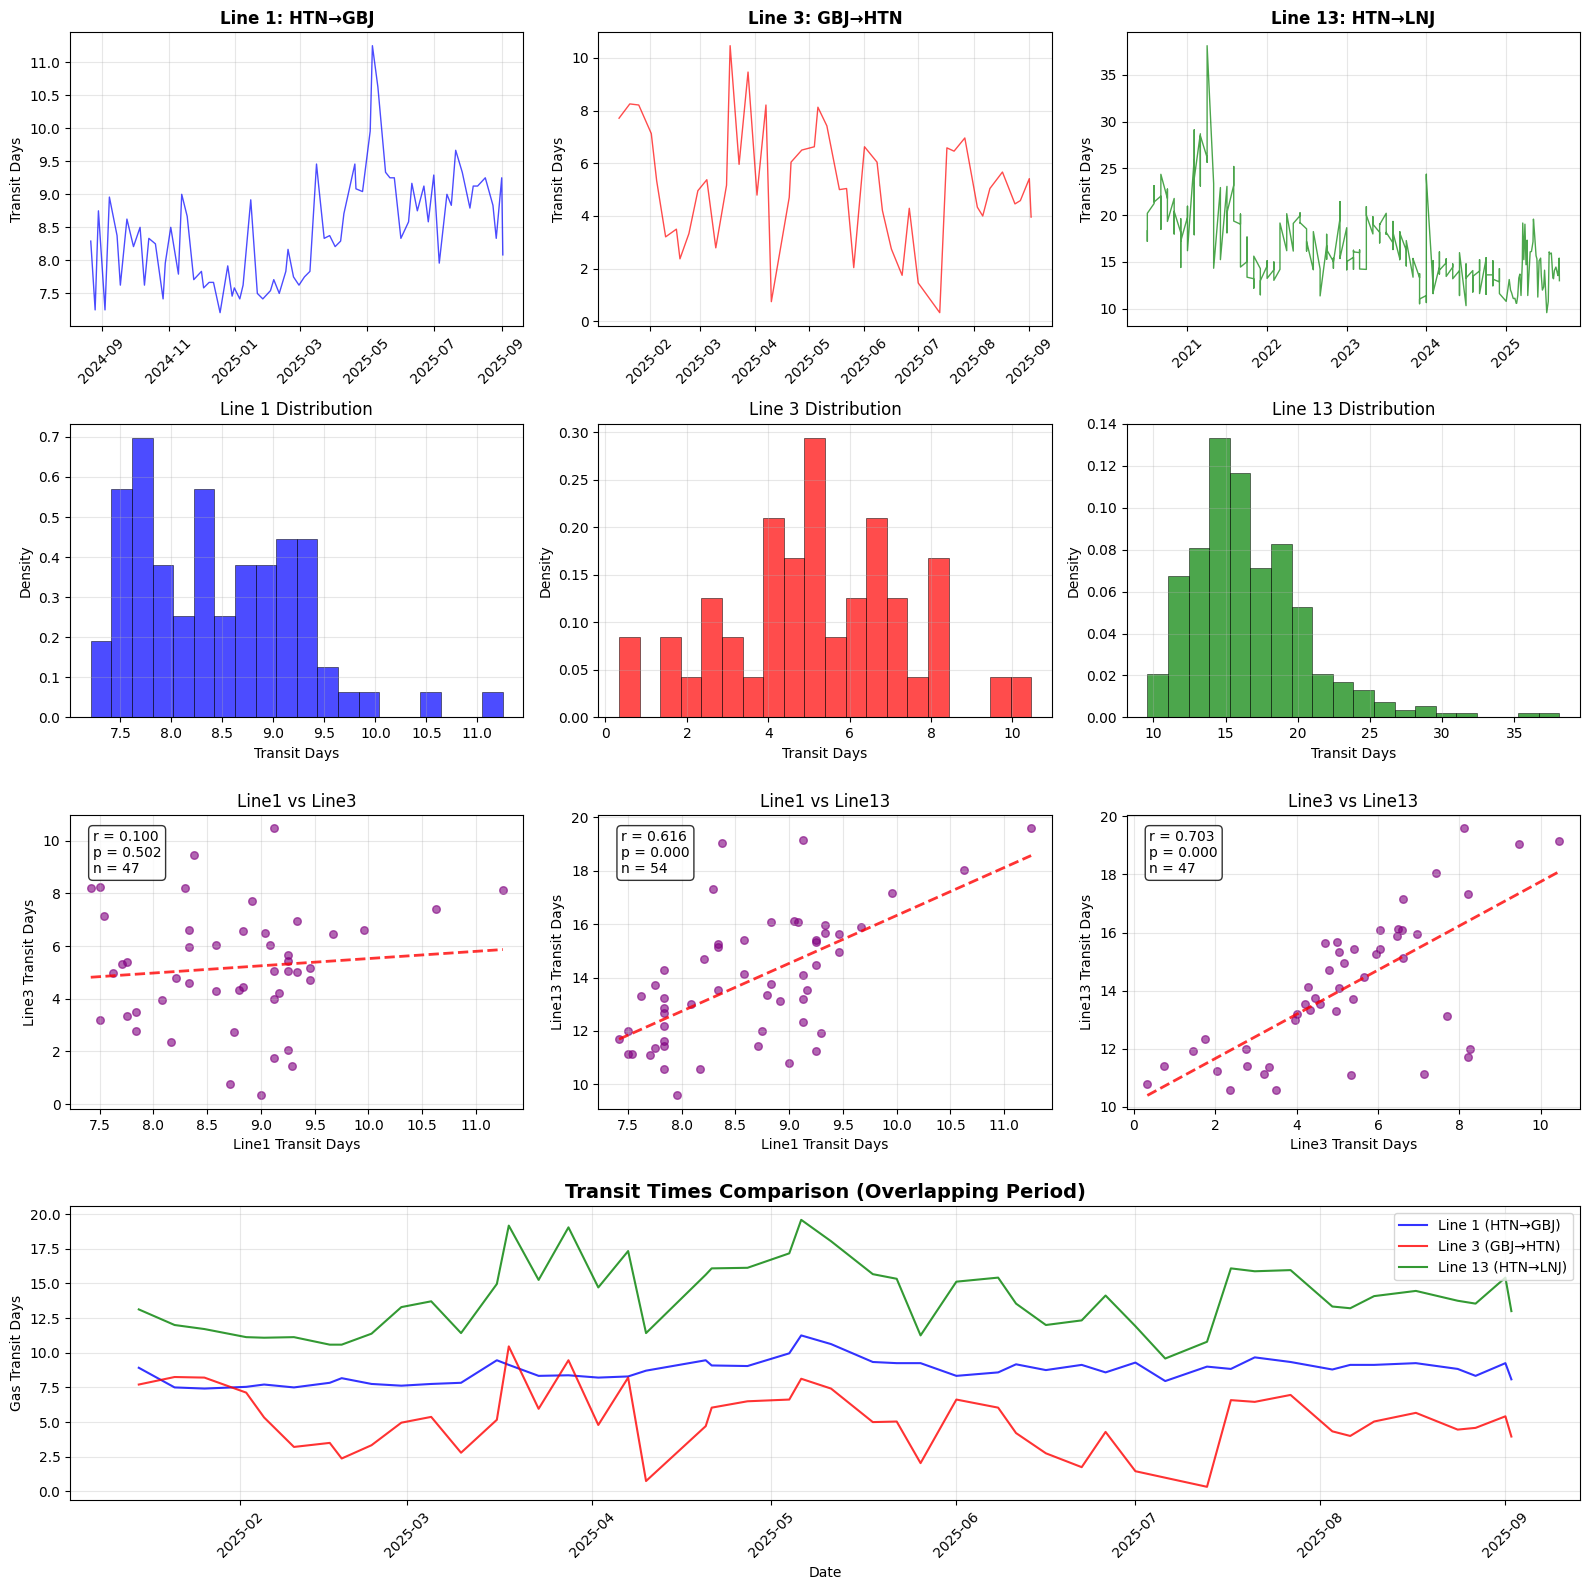


📊 Transit Time Correlation Matrix Analysis Complete!

This visualization shows:
• Row 1: Individual time series for each pipeline line
• Row 2: Distribution histograms showing transit time patterns
• Row 3: Scatter plots with regression lines for all pair combinations
• Row 4: Overlay plot showing all lines during their common time period


In [35]:
# Create comprehensive pairwise visualization (similar to ggpairs in R)
def create_transit_correlation_matrix(correlation_results, pipeline_data):
    """Create a comprehensive pairwise plot matrix with the function resul"""
    
    # Set up the plot grid (4x4 for comprehensive view)
    fig = plt.figure(figsize=(16, 16))
    
    # Define line info for labeling
    line_info = {
        'Line1': {'name': 'Line 1', 'route': 'HTN→GBJ', 'color': 'blue'},
        'Line3': {'name': 'Line 3', 'route': 'GBJ→HTN', 'color': 'red'},
        'Line13': {'name': 'Line 13', 'route': 'HTN→LNJ', 'color': 'green'}
    }
    
    # Row 1: Individual time series
    for i, (line_key, line_data) in enumerate(pipeline_data.items()):
        ax = plt.subplot(4, 3, i + 1)
        # Filter out NaN values for plotting
        clean_data = line_data.dropna(subset=['Gas Transit Days'])
        if len(clean_data) > 0:
            ax.plot(clean_data['Date'], clean_data['Gas Transit Days'], 
                   color=line_info[line_key]['color'], alpha=0.7, linewidth=1)
        ax.set_title(f"{line_info[line_key]['name']}: {line_info[line_key]['route']}", 
                    fontweight='bold')
        ax.set_ylabel('Transit Days')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
    
    # Row 2: Distribution histograms
    for i, (line_key, line_data) in enumerate(pipeline_data.items()):
        ax = plt.subplot(4, 3, i + 4)
        # Filter out NaN values for histogram
        clean_values = line_data['Gas Transit Days'].dropna()
        if len(clean_values) > 0:
            ax.hist(clean_values, bins=20, alpha=0.7, 
                   color=line_info[line_key]['color'], density=True, 
                   edgecolor='black', linewidth=0.5)
            ax.set_xlabel('Transit Days')
            ax.set_ylabel('Density')
        else:
            ax.text(0.5, 0.5, 'No valid data', transform=ax.transAxes, 
                   ha='center', va='center', fontsize=12, color='gray')
        ax.set_title(f"{line_info[line_key]['name']} Distribution")
        ax.grid(True, alpha=0.3)
    
    # Row 3: Scatter plots for each pair with correlation
    scatter_positions = [7, 8, 9]  # positions for 3 scatter plots
    pair_keys = ['Line1_vs_Line3', 'Line1_vs_Line13', 'Line3_vs_Line13']
    
    for pos, key in zip(scatter_positions, pair_keys):
        ax = plt.subplot(4, 3, pos)
        results = correlation_results[key]
        
        # First, ensure we have proper merged data
        if 'merged_data' not in results or len(results['merged_data']) == 0:
            # Create merged data if missing
            line1_key = results['name1']
            line2_key = results['name2']
            if line1_key in pipeline_data and line2_key in pipeline_data:
                data1 = pipeline_data[line1_key][['Date', 'Gas Transit Days']].copy()
                data2 = pipeline_data[line2_key][['Date', 'Gas Transit Days']].copy()
                merged = pd.merge(data1, data2, on='Date', suffixes=(f'_{line1_key}', f'_{line2_key}'))
                results['merged_data'] = merged
        
        if 'merged_data' in results and len(results['merged_data']) > 0:
            merged = results['merged_data']
            col1 = f"Gas Transit Days_{results['name1']}"
            col2 = f"Gas Transit Days_{results['name2']}"
            
            # Remove NaN values and check for sufficient data
            clean_merged = merged[[col1, col2]].dropna()
            
            if len(clean_merged) >= 3:  # Need at least 3 points for regression
                ax.scatter(clean_merged[col1], clean_merged[col2], alpha=0.6, 
                          color='purple', s=30)
                
                # Check if correlation is nan and recalculate if needed
                r = results.get('pearson_r', np.nan)
                p_val = results.get('pearson_p', np.nan)
                
                if pd.isna(r) or pd.isna(p_val):
                    try:
                        from scipy.stats import pearsonr
                        r, p_val = pearsonr(clean_merged[col1], clean_merged[col2])
                        # Update the results dictionary
                        results['pearson_r'] = r
                        results['pearson_p'] = p_val
                        print(f"Recalculated correlation for {results['name1']} vs {results['name2']}: r = {r:.3f}")
                    except Exception as e:
                        print(f"Failed to recalculate correlation for {results['name1']} vs {results['name2']}: {e}")
                        r, p_val = np.nan, np.nan
                
                # Add regression line with error handling
                try:
                    x_vals = clean_merged[col1].values
                    y_vals = clean_merged[col2].values
                    
                    # Check for sufficient variation in x values
                    if np.std(x_vals) > 1e-10 and len(np.unique(x_vals)) > 1:
                        z = np.polyfit(x_vals, y_vals, 1)
                        p = np.poly1d(z)
                        x_line = np.linspace(x_vals.min(), x_vals.max(), 100)
                        ax.plot(x_line, p(x_line), "r--", alpha=0.8, linewidth=2)
                    else:
                        print(f"Warning: Insufficient variation in {results['name1']} data for regression")
                        
                except (np.linalg.LinAlgError, np.RankWarning) as e:
                    print(f"Warning: Could not fit regression line for {results['name1']} vs {results['name2']}: {e}")
                
                ax.set_xlabel(f"{results['name1']} Transit Days")
                ax.set_ylabel(f"{results['name2']} Transit Days")
                ax.set_title(f"{results['name1']} vs {results['name2']}")
                
                # Add correlation text with proper nan handling
                n_points = len(clean_merged)
                if not pd.isna(r):
                    ax.text(0.05, 0.95, f'r = {r:.3f}\np = {p_val:.3f}\nn = {n_points}', 
                           transform=ax.transAxes, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                           fontsize=10)
                else:
                    ax.text(0.05, 0.95, f'r = calculation failed\nn = {n_points}', 
                           transform=ax.transAxes, verticalalignment='top',
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                           fontsize=10)
            else:
                ax.text(0.5, 0.5, f'Insufficient data\n({len(clean_merged)} points)', 
                       transform=ax.transAxes, ha='center', va='center',
                       fontsize=12, color='gray')
                ax.set_title(f"{results['name1']} vs {results['name2']}")
        else:
            ax.text(0.5, 0.5, 'No overlapping\ndata', 
                   transform=ax.transAxes, ha='center', va='center',
                   fontsize=12, color='gray')
            ax.set_title(f"{results['name1']} vs {results['name2']}")
        
        ax.grid(True, alpha=0.3)
    
    # Row 4: Combined time series overlay
    ax = plt.subplot(4, 1, 4)
    
    # Find common date range for overlay (only for lines with data)
    valid_data = {}
    for line_key, line_data in pipeline_data.items():
        clean_data = line_data.dropna(subset=['Gas Transit Days'])
        if len(clean_data) > 0:
            valid_data[line_key] = clean_data
    
    if len(valid_data) > 1:
        common_start = max(data['Date'].min() for data in valid_data.values())
        common_end = min(data['Date'].max() for data in valid_data.values())
        
        for line_key, line_data in valid_data.items():
            # Filter to common period for better comparison
            filtered_data = line_data[(line_data['Date'] >= common_start) & 
                                     (line_data['Date'] <= common_end)]
            if len(filtered_data) > 0:
                ax.plot(filtered_data['Date'], filtered_data['Gas Transit Days'], 
                       color=line_info[line_key]['color'], alpha=0.8, linewidth=1.5,
                       label=f"{line_info[line_key]['name']} ({line_info[line_key]['route']})")
        
        ax.set_title('Transit Times Comparison (Overlapping Period)', fontweight='bold', fontsize=14)
        ax.legend(loc='upper right')
    else:
        # Plot individual series even if no overlap
        for line_key, line_data in valid_data.items():
            ax.plot(line_data['Date'], line_data['Gas Transit Days'], 
                   color=line_info[line_key]['color'], alpha=0.8, linewidth=1.5,
                   label=f"{line_info[line_key]['name']} ({line_info[line_key]['route']})")
        
        ax.set_title('Transit Times (Individual Series)', fontweight='bold', fontsize=14)
        if valid_data:
            ax.legend(loc='upper right')
    
    ax.set_xlabel('Date')
    ax.set_ylabel('Gas Transit Days')
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return fig

# Create the comprehensive transit correlation matrix with robust error handling

correlation_matrix_fig = create_transit_correlation_matrix(correlation_results, pipeline_data)
print("\n📊 Transit Time Correlation Matrix Analysis Complete!")
print("\nThis visualization shows:")
print("• Row 1: Individual time series for each pipeline line")
print("• Row 2: Distribution histograms showing transit time patterns")  
print("• Row 3: Scatter plots with regression lines for all pair combinations")
print("• Row 4: Overlay plot showing all lines during their common time period")


In [36]:
# Create comprehensive summary table with proper NaN handling
def create_summary_table(correlation_results):
    """Create a summary table of all correlation analyses with robust error handling"""
    summary_data = []
    
    for key, results in correlation_results.items():
        # Helper function to format numbers or return 'nan'
        def format_number(value, decimals=3):
            if pd.isna(value) or value != value:  # Check for NaN
                return 'nan'
            return f"{value:.{decimals}f}"
        
        # Helper function to format p-values
        def format_pvalue(value):
            if pd.isna(value) or value != value:
                return 'nan'
            if value < 0.001:
                return '0.000'
            return f"{value:.3f}"
        
        if 'pearson_r' in results and not pd.isna(results.get('pearson_r')):
            # Has valid correlation data
            summary_data.append({
                'Pair': f"{results['name1']} vs {results['name2']}",
                'Period': f"{results['start_date'].date()} to {results['end_date'].date()}",
                'N': results['n_observations'],
                'Pearson r': format_number(results['pearson_r']),
                'P-value': format_pvalue(results['pearson_p']),
                'Spearman ρ': format_number(results.get('spearman_r', float('nan'))),
                'Cointegrated': '✅' if results.get('is_cointegrated', False) else '❌',
                'Coint p-value': format_pvalue(results.get('coint_p', float('nan')))
            })
        else:
            # No valid correlation data
            summary_data.append({
                'Pair': f"{results['name1']} vs {results['name2']}",
                'Period': f"{results['start_date'].date()} to {results['end_date'].date()}",
                'N': results['n_observations'],
                'Pearson r': 'nan',
                'P-value': 'nan',
                'Spearman ρ': 'nan',
                'Cointegrated': '❌',
                'Coint p-value': 'N/A'
            })
    
    return pd.DataFrame(summary_data)

def create_stats_table(pipeline_data):
    """Create statistics table for all pipeline lines"""
    stats_data = []
    route_map = {
        'Line1': 'HTN → GBJ',
        'Line3': 'GBJ → HTN', 
        'Line13': 'HTN → LNJ'
    }
    
    for name, data in pipeline_data.items():
        transit_days = data['Gas Transit Days'].dropna()  # Remove NaN values
        
        if len(transit_days) > 0:
            stats_data.append({
                'Line': name,
                'Route': route_map[name],
                'Records': len(transit_days),
                'Mean (days)': f"{transit_days.mean():.2f}",
                'Std (days)': f"{transit_days.std():.2f}",
                'Min (days)': f"{transit_days.min():.2f}",
                'Max (days)': f"{transit_days.max():.2f}",
                'Date Range': f"{data['Date'].min().date()} to {data['Date'].max().date()}"
            })
        else:
            stats_data.append({
                'Line': name,
                'Route': route_map[name],
                'Records': 0,
                'Mean (days)': 'N/A',
                'Std (days)': 'N/A',
                'Min (days)': 'N/A',
                'Max (days)': 'N/A',
                'Date Range': 'No data'
            })
    
    return pd.DataFrame(stats_data)

# Generate the summary tables
print("\n" + "="*80)
print("COMPREHENSIVE CORRELATION SUMMARY")
print("="*80)

summary_df = create_summary_table(correlation_results)
print(summary_df.to_string(index=False))

print("\n" + "="*80)
print("TRANSIT TIME STATISTICS BY LINE") 
print("="*80)

stats_df = create_stats_table(pipeline_data)
print(stats_df.to_string(index=False))

# Additional insights
print("\n" + "="*80)
print("KEY INSIGHTS")
print("="*80)

# Count significant correlations
significant_correlations = 0
total_correlations = 0

for key, results in correlation_results.items():
    if 'pearson_p' in results and not pd.isna(results['pearson_p']):
        total_correlations += 1
        if results['pearson_p'] < 0.05:
            significant_correlations += 1

print(f"• Total correlation pairs analyzed: {len(correlation_results)}")
print(f"• Pairs with valid correlations: {total_correlations}")
print(f"• Statistically significant correlations (p < 0.05): {significant_correlations}")

# Identify strongest correlations
valid_correlations = []
for key, results in correlation_results.items():
    if 'pearson_r' in results and not pd.isna(results['pearson_r']):
        valid_correlations.append((key, abs(results['pearson_r']), results['pearson_r']))

if valid_correlations:
    strongest = max(valid_correlations, key=lambda x: x[1])
    print(f"• Strongest correlation: {strongest[0]} (r = {strongest[2]:.3f})")

# Cointegration summary
cointegrated_pairs = [key for key, results in correlation_results.items() 
                     if results.get('is_cointegrated', False)]
if cointegrated_pairs:
    print(f"• Cointegrated pairs: {len(cointegrated_pairs)} ({', '.join(cointegrated_pairs)})")
else:
    print("• No cointegrated pairs detected")


COMPREHENSIVE CORRELATION SUMMARY
           Pair                   Period  N Pearson r P-value Spearman ρ Cointegrated Coint p-value
 Line1 vs Line3 2025-01-15 to 2025-09-02 48     0.100   0.502      0.071            ❌         0.185
Line1 vs Line13 2024-08-22 to 2025-09-02 54     0.616   0.000      0.586            ✅         0.000
Line3 vs Line13 2025-01-15 to 2025-09-02 48     0.703   0.000      0.659            ❌         0.061

TRANSIT TIME STATISTICS BY LINE
  Line     Route  Records Mean (days) Std (days) Min (days) Max (days)               Date Range
 Line1 HTN → GBJ       78        8.43       0.80       7.21      11.25 2024-08-22 to 2025-09-02
 Line3 GBJ → HTN       47        5.18       2.23       0.33      10.46 2025-01-15 to 2025-09-02
Line13 HTN → LNJ      373       16.58       4.07       9.58      38.12 2020-07-01 to 2025-09-02

KEY INSIGHTS
• Total correlation pairs analyzed: 3
• Pairs with valid correlations: 3
• Statistically significant correlations (p < 0.05): 2
• Stro

In [ ]:
# RUN THE COMPLETE PIPELINE
results = run_pipeline()

In [ ]:
# ===================================================================
# COMPLETE FORECASTING PIPELINE - ALL FUNCTIONS IN ONE CELL
# ===================================================================

# Step 1: Data Alignment
def _align_pipeline_data(pipeline_data):
    """Align L1, L3, L13 data by date with proper handling of missing values"""
    l1_data = pipeline_data['L1'].copy()
    l3_data = pipeline_data['L3'].copy()
    l13_data = pipeline_data['L13'].copy()
    
    for df in [l1_data, l3_data, l13_data]:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    aligned = pd.DataFrame(index=pd.date_range(
        start=max(l1_data.index.min(), l3_data.index.min(), l13_data.index.min()),
        end=min(l1_data.index.max(), l3_data.index.max(), l13_data.index.max()),
        freq='D'
    ))
    
    aligned['L1'] = l1_data['Gas Transit Days'].reindex(aligned.index)
    aligned['L3'] = l3_data['Gas Transit Days'].reindex(aligned.index) 
    aligned['L13'] = l13_data['Gas Transit Days'].reindex(aligned.index)
    aligned = aligned.fillna(method='ffill', limit=7).dropna()
    aligned['trend'] = np.arange(1, len(aligned) + 1)
    
    print(f"Aligned data shape: {aligned.shape}")
    print(f"Date range: {aligned.index.min()} to {aligned.index.max()}")
    return aligned

# Step 2: Cointegrating Relations
def _estimate_cointegrating_relation(aligned_data):
    """Estimate long-run cointegrating relation: L1_t = β0 + β1*L13_t + β2*trend_t + u_t"""
    y = aligned_data['L1'].values
    X = sm.add_constant(aligned_data[['L13', 'trend']].values)
    coint_model = sm.OLS(y, X).fit()
    aligned_data['ecm_term'] = coint_model.resid
    beta0, beta1, beta2 = coint_model.params
    
    print("=== COINTEGRATING RELATION ===")
    print(f"L1_t = {beta0:.4f} + {beta1:.4f}*L13_t + {beta2:.6f}*trend_t + u_t")
    print(f"R-squared: {coint_model.rsquared:.4f}")
    
    return {
        'model': coint_model,
        'coefficients': {'beta0': beta0, 'beta1': beta1, 'beta2': beta2},
        'ecm_term': aligned_data['ecm_term']
    }

# Step 3: ECM Model
def _build_ecm_model(aligned_data, max_lags=5):
    """Build ECM model with AIC-based lag selection"""
    aligned_data['dL1'] = aligned_data['L1'].diff()
    aligned_data['dL13'] = aligned_data['L13'].diff()
    model_data = aligned_data.dropna().copy()
    
    best_aic = np.inf
    best_lag = 1
    best_model = None
    aic_results = {}
    
    for lag in range(1, max_lags + 1):
        try:
            y = model_data['dL1'].iloc[lag:].values
            ecm_lag1 = model_data['ecm_term'].shift(1).iloc[lag:].values
            
            X_components = [ecm_lag1]
            for i in range(1, lag + 1):
                X_components.append(model_data['dL1'].shift(i).iloc[lag:].values)
                X_components.append(model_data['dL13'].shift(i).iloc[lag:].values)
            
            X = sm.add_constant(np.column_stack(X_components))
            ecm_model = sm.OLS(y, X).fit()
            aic_results[lag] = ecm_model.aic
            
            if ecm_model.aic < best_aic:
                best_aic = ecm_model.aic
                best_lag = lag
                best_model = ecm_model
        except Exception as e:
            print(f"Warning: Lag {lag} failed: {e}")
            continue
    
    ecm_coeff = best_model.params[1]
    print("=== ERROR CORRECTION MODEL ===")
    print(f"Selected lag order: {best_lag} (AIC = {best_aic:.2f})")
    print(f"ECM coefficient: {ecm_coeff:.4f}")
    
    return {
        'model': best_model,
        'selected_lag': best_lag,
        'ecm_coefficient': ecm_coeff,
        'aic_results': aic_results,
        'model_data': model_data
    }

# Step 4: Alternative Models
def _build_alternative_models(aligned_data, ecm_results):
    """Build ARDL-ECM and VECM alternatives if available"""
    alternatives = {}
    try:
        from statsmodels.tsa.ardl import ARDL
        model_data = ecm_results['model_data']
        ardl_data = model_data[['L1', 'L13']].dropna()
        ardl_model = ARDL(ardl_data['L1'], ardl_data['L13'], lags=2, order={'L13': 2})
        ardl_fit = ardl_model.fit()
        alternatives['ARDL_ECM'] = {'model': ardl_fit, 'aic': ardl_fit.aic}
        print(f"ARDL AIC: {ardl_fit.aic:.2f}")
    except:
        print("ARDL not available")
        alternatives['ARDL_ECM'] = None
    
    try:
        from statsmodels.tsa.vector_ar.vecm import VECM
        model_data = ecm_results['model_data']
        vecm_data = model_data[['L1', 'L13']].dropna().values
        vecm_model = VECM(vecm_data, k_ar_diff=ecm_results['selected_lag'], coint_rank=1, deterministic='ci')
        vecm_fit = vecm_model.fit()
        alternatives['VECM'] = {'model': vecm_fit, 'aic': vecm_fit.aic}
        print(f"VECM AIC: {vecm_fit.aic:.2f}")
    except:
        print("VECM not available")
        alternatives['VECM'] = None
    
    return alternatives

# Helper for ECM forecasting
def _ecm_forecast(data, coint_coeffs, lag, horizon):
    """Generate ECM-based forecast"""
    try:
        current_level = data['L1'].iloc[-1]
        ecm_term = (data['L1'].iloc[-1] - coint_coeffs['beta0'] - 
                   coint_coeffs['beta1'] * data['L13'].iloc[-1] - 
                   coint_coeffs['beta2'] * len(data))
        adjustment = -0.1 * ecm_term
        return current_level + adjustment
    except:
        return data['L1'].iloc[-1]

# Step 5: Forecast Evaluation
def _forecast_evaluation(aligned_data, coint_results, ecm_results, alternatives, horizon=1):
    """Perform rolling and expanding window forecast evaluation"""
    model_data = ecm_results['model_data']
    n_obs = len(model_data)
    min_train = max(50, 2 * ecm_results['selected_lag'])
    
    forecasts = {
        'ECM': {'rolling': [], 'expanding': []},
        'Random_Walk': {'rolling': [], 'expanding': []},
        'AR': {'rolling': [], 'expanding': []},
        'dates': [], 'actuals': []
    }
    
    print("=== FORECAST EVALUATION ===")
    print(f"Total observations: {n_obs}, Min training: {min_train}")
    
    for i in range(min_train, n_obs - horizon):
        try:
            date = model_data.index[i + horizon]
            actual = model_data['L1'].iloc[i + horizon]
            forecasts['dates'].append(date)
            forecasts['actuals'].append(actual)
            
            roll_start = max(0, i - min_train) if i >= min_train + 20 else 0
            roll_data = model_data.iloc[roll_start:i]
            exp_data = model_data.iloc[:i]
            
            for window_type, data in [('rolling', roll_data), ('expanding', exp_data)]:
                ecm_forecast = _ecm_forecast(data, coint_results['coefficients'], 
                                           ecm_results['selected_lag'], horizon)
                forecasts['ECM'][window_type].append(ecm_forecast)
                forecasts['Random_Walk'][window_type].append(data['L1'].iloc[-1])
                
                try:
                    ar_model = sm.tsa.ARIMA(data['L1'], order=(1,0,0)).fit()
                    ar_forecast = ar_model.forecast(steps=horizon)[0]
                except:
                    ar_forecast = data['L1'].mean()
                forecasts['AR'][window_type].append(ar_forecast)
        except Exception as e:
            print(f"Warning: Forecast at {i} failed: {e}")
            continue
    
    # Calculate metrics
    evaluation = {}
    for model in ['ECM', 'Random_Walk', 'AR']:
        evaluation[model] = {}
        for window in ['rolling', 'expanding']:
            if forecasts[model][window]:
                errors = np.array(forecasts['actuals'][:len(forecasts[model][window])]) - np.array(forecasts[model][window])
                evaluation[model][window] = {
                    'RMSE': np.sqrt(np.mean(errors**2)),
                    'MAE': np.mean(np.abs(errors)),
                    'MAPE': np.mean(np.abs(errors / np.array(forecasts['actuals'][:len(forecasts[model][window])]))) * 100
                }
    
    print("\\n=== FORECAST PERFORMANCE ===")
    for model in evaluation:
        for window in evaluation[model]:
            metrics = evaluation[model][window]
            print(f"{model} ({window}): RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.2f}%")
    
    return {'forecasts': forecasts, 'evaluation': evaluation}

# Step 6: Display Results
def _display_results(results):
    """Display charts and results in notebook cells"""
    from IPython.display import display
    
    # Model Summary
    summary_df = pd.DataFrame({
        'Metric': ['Beta_0', 'Beta_1', 'Beta_2', 'ECM_Coefficient', 'Selected_Lag', 'R_Squared', 'AIC'],
        'Value': [
            results['coint_results']['coefficients']['beta0'],
            results['coint_results']['coefficients']['beta1'], 
            results['coint_results']['coefficients']['beta2'],
            results['ecm_results']['ecm_coefficient'],
            results['ecm_results']['selected_lag'],
            results['ecm_results']['model'].rsquared,
            results['ecm_results']['model'].aic
        ]
    })
    print("=== MODEL SUMMARY ===")
    display(summary_df)
    
    # Forecast Evaluation
    eval_data = []
    for model in results['forecast_results']['evaluation']:
        for window in results['forecast_results']['evaluation'][model]:
            metrics = results['forecast_results']['evaluation'][model][window]
            eval_data.append({
                'Model': model, 'Window': window,
                'RMSE': metrics['RMSE'], 'MAE': metrics['MAE'], 'MAPE': metrics['MAPE']
            })
    
    eval_df = pd.DataFrame(eval_data)
    print("\\n=== FORECAST EVALUATION ===")
    display(eval_df)
    
    # Forecast Data
    forecast_df = pd.DataFrame({
        'Date': results['forecast_results']['forecasts']['dates'],
        'Actual_L1': results['forecast_results']['forecasts']['actuals'],
        'ECM_Rolling': results['forecast_results']['forecasts']['ECM']['rolling'],
        'ECM_Expanding': results['forecast_results']['forecasts']['ECM']['expanding'],
        'RW_Rolling': results['forecast_results']['forecasts']['Random_Walk']['rolling'],
        'RW_Expanding': results['forecast_results']['forecasts']['Random_Walk']['expanding'],
        'AR_Rolling': results['forecast_results']['forecasts']['AR']['rolling'],
        'AR_Expanding': results['forecast_results']['forecasts']['AR']['expanding']
    })
    print("\\n=== FORECAST DATA (First 10 rows) ===")
    display(forecast_df.head(10))
    
    _display_plots(results)

def _display_plots(results):
    """Create and display plots"""
    forecasts = results['forecast_results']['forecasts']
    
    # Forecast Performance
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    dates, actuals = forecasts['dates'], forecasts['actuals']
    
    ax1.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax1.plot(dates, forecasts['ECM']['rolling'], 'b--', label='ECM Rolling', alpha=0.7)
    ax1.plot(dates, forecasts['Random_Walk']['rolling'], 'r:', label='Random Walk', alpha=0.7)
    ax1.plot(dates, forecasts['AR']['rolling'], 'g-.', label='AR(1)', alpha=0.7)
    ax1.set_title('Rolling Window Forecasts')
    ax1.legend()
    ax1.set_ylabel('L1 Transit Days')
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax2.plot(dates, forecasts['ECM']['expanding'], 'b--', label='ECM Expanding', alpha=0.7)
    ax2.plot(dates, forecasts['Random_Walk']['expanding'], 'r:', label='Random Walk', alpha=0.7)
    ax2.plot(dates, forecasts['AR']['expanding'], 'g-.', label='AR(1)', alpha=0.7)
    ax2.set_title('Expanding Window Forecasts')
    ax2.legend()
    ax2.set_ylabel('L1 Transit Days')
    ax2.set_xlabel('Date')
    ax2.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Cointegrating Relationship
    aligned_data = results['aligned_data']
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(aligned_data['L13'], aligned_data['L1'], alpha=0.6, s=20)
    
    coeffs = results['coint_results']['coefficients']
    x_range = np.linspace(aligned_data['L13'].min(), aligned_data['L13'].max(), 100)
    y_fitted = coeffs['beta0'] + coeffs['beta1'] * x_range
    ax.plot(x_range, y_fitted, 'r-', linewidth=2, 
           label=f"L1 = {coeffs['beta0']:.2f} + {coeffs['beta1']:.2f}*L13")
    
    ax.set_xlabel('L13 Transit Days')
    ax.set_ylabel('L1 Transit Days')
    ax.set_title('Cointegrating Relationship: L1 vs L13')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.show()

# MAIN PIPELINE FUNCTION
def run_pipeline(df_or_path='data/colonial_transit_time.xlsx'):
    """Execute complete forecasting pipeline"""
    
    print("=== COLONIAL PIPELINE FORECASTING PIPELINE ===")
    print("Using GIVEN FACTS:")
    print("- L1 is I(1) non-stationary")
    print("- L13 is ambiguous order of integration") 
    print("- L3 is I(0) stationary")
    print("- L1 and L13 are cointegrated")
    print("=" * 50)
    
    if isinstance(df_or_path, str):
        pipeline_data = {
            'L1': pd.read_excel(df_or_path, sheet_name='line1'),
            'L3': pd.read_excel(df_or_path, sheet_name='line3'),
            'L13': pd.read_excel(df_or_path, sheet_name='line13')
        }
    else:
        pipeline_data = df_or_path
    
    try:
        print("\\nStep 1: Aligning pipeline data...")
        aligned_data = _align_pipeline_data(pipeline_data)
        
        print("\\nStep 2: Estimating cointegrating relation...")
        coint_results = _estimate_cointegrating_relation(aligned_data)
        
        print("\\nStep 3: Building ECM model...")
        ecm_results = _build_ecm_model(aligned_data)
        
        print("\\nStep 4: Building alternative models...")
        alternatives = _build_alternative_models(aligned_data, ecm_results)
        
        print("\\nStep 5: Evaluating forecasts...")
        forecast_results = _forecast_evaluation(aligned_data, coint_results, ecm_results, alternatives)
        
        results = {
            'aligned_data': aligned_data,
            'coint_results': coint_results,
            'ecm_results': ecm_results,
            'alternatives': alternatives,
            'forecast_results': forecast_results
        }
        
        print("\\nStep 6: Displaying results...")
        _display_results(results)
        
        key_metrics = {
            'ecm_coefficient': ecm_results['ecm_coefficient'],
            'selected_lag': ecm_results['selected_lag'],
            'cointegration_coeffs': coint_results['coefficients'],
            'best_forecast_rmse': min([
                forecast_results['evaluation']['ECM']['rolling']['RMSE'],
                forecast_results['evaluation']['ECM']['expanding']['RMSE']
            ]),
            'fitted_ecm_object': ecm_results['model']
        }
        
        print("\\n=== PIPELINE COMPLETED SUCCESSFULLY ===")
        return key_metrics
        
    except Exception as e:
        print(f"\\nERROR in pipeline: {e}")
        import traceback
        traceback.print_exc()
        return None

print("All functions defined successfully! Ready to run pipeline.")

In [ ]:
# EXECUTE THE COMPLETE FORECASTING PIPELINE
results = run_pipeline()

In [ ]:
# MAIN PIPELINE FUNCTION - DEFINED AFTER ALL HELPERS
def run_pipeline(df_or_path='data/colonial_transit_time.xlsx'):
    """
    DELIVERABLE: Execute complete forecasting pipeline
    
    Parameters:
    -----------
    df_or_path : str or DataFrame
        Path to transit time data or DataFrame with pipeline data
        
    Returns:
    --------
    dict : Results containing key metrics and fitted ECM object
    """
    
    print("=== COLONIAL PIPELINE FORECASTING PIPELINE ===")
    print("Using GIVEN FACTS:")
    print("- L1 is I(1) non-stationary") 
    print("- L13 is ambiguous order of integration")
    print("- L3 is I(0) stationary")
    print("- L1 and L13 are cointegrated")
    print("=" * 50)
    
    # Load data if path provided
    if isinstance(df_or_path, str):
        pipeline_data = {
            'L1': pd.read_excel(df_or_path, sheet_name='line1'),
            'L3': pd.read_excel(df_or_path, sheet_name='line3'), 
            'L13': pd.read_excel(df_or_path, sheet_name='line13')
        }
    else:
        pipeline_data = df_or_path
    
    try:
        # Step 1: Data Alignment
        print("\\nStep 1: Aligning pipeline data...")
        aligned_data = _align_pipeline_data(pipeline_data)
        
        # Step 2: Cointegrating Relations  
        print("\\nStep 2: Estimating cointegrating relation...")
        coint_results = _estimate_cointegrating_relation(aligned_data)
        
        # Step 3: ECM Model
        print("\\nStep 3: Building ECM model...")
        ecm_results = _build_ecm_model(aligned_data)
        
        # Step 4: Alternative Models
        print("\\nStep 4: Building alternative models...")
        alternatives = _build_alternative_models(aligned_data, ecm_results)
        
        # Step 5: Forecast Evaluation
        print("\\nStep 5: Evaluating forecasts...")
        forecast_results = _forecast_evaluation(aligned_data, coint_results, ecm_results, alternatives)
        
        # Compile results
        results = {
            'aligned_data': aligned_data,
            'coint_results': coint_results,
            'ecm_results': ecm_results,
            'alternatives': alternatives,
            'forecast_results': forecast_results
        }
        
        # Step 6: Display Results 
        print("\\nStep 6: Displaying results...")
        _display_results(results)
        
        # Return key metrics
        key_metrics = {
            'ecm_coefficient': ecm_results['ecm_coefficient'],
            'selected_lag': ecm_results['selected_lag'],
            'cointegration_coeffs': coint_results['coefficients'],
            'best_forecast_rmse': min([
                forecast_results['evaluation']['ECM']['rolling']['RMSE'],
                forecast_results['evaluation']['ECM']['expanding']['RMSE']
            ]),
            'fitted_ecm_object': ecm_results['model']
        }
        
        print("\\n=== PIPELINE COMPLETED SUCCESSFULLY ===")
        return key_metrics
        
    except Exception as e:
        print(f"\\nERROR in pipeline: {e}")
        import traceback
        traceback.print_exc()
        return None

In [ ]:
# ALL HELPER FUNCTIONS - DEFINED FIRST

# Step 1: Data Alignment
def _align_pipeline_data(pipeline_data):
    """Align L1, L3, L13 data by date with proper handling of missing values"""
    
    # Extract series from pipeline_data
    l1_data = pipeline_data['L1'].copy()
    l3_data = pipeline_data['L3'].copy()
    l13_data = pipeline_data['L13'].copy()
    
    # Ensure datetime index
    for df in [l1_data, l3_data, l13_data]:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Create aligned dataset
    aligned = pd.DataFrame(index=pd.date_range(
        start=max(l1_data.index.min(), l3_data.index.min(), l13_data.index.min()),
        end=min(l1_data.index.max(), l3_data.index.max(), l13_data.index.max()),
        freq='D'
    ))
    
    # Merge transit times
    aligned['L1'] = l1_data['Gas Transit Days'].reindex(aligned.index)
    aligned['L3'] = l3_data['Gas Transit Days'].reindex(aligned.index) 
    aligned['L13'] = l13_data['Gas Transit Days'].reindex(aligned.index)
    
    # Forward fill missing values (max 7 days)
    aligned = aligned.fillna(method='ffill', limit=7)
    
    # Remove remaining NaNs
    aligned = aligned.dropna()
    
    # Add time trend
    aligned['trend'] = np.arange(1, len(aligned) + 1)
    
    print(f"Aligned data shape: {aligned.shape}")
    print(f"Date range: {aligned.index.min()} to {aligned.index.max()}")
    print(f"Missing values: {aligned.isnull().sum().sum()}")
    
    return aligned

# Step 2: Estimate Cointegrating Relations
def _estimate_cointegrating_relation(aligned_data):
    """Estimate long-run cointegrating relation: L1_t = β0 + β1*L13_t + β2*trend_t + u_t"""
    
    # GIVEN FACT: L1 and L13 are cointegrated
    y = aligned_data['L1'].values
    X = sm.add_constant(aligned_data[['L13', 'trend']].values)
    
    # OLS estimation of cointegrating relation
    coint_model = sm.OLS(y, X).fit()
    
    # Calculate residuals (error correction term)
    aligned_data['ecm_term'] = coint_model.resid
    
    # Store coefficients
    beta0, beta1, beta2 = coint_model.params
    
    print("=== COINTEGRATING RELATION ===")
    print(f"L1_t = {beta0:.4f} + {beta1:.4f}*L13_t + {beta2:.6f}*trend_t + u_t")
    print(f"R-squared: {coint_model.rsquared:.4f}")
    print(f"ADF test on residuals: {sm.tsa.stattools.adfuller(coint_model.resid)[1]:.4f}")
    
    return {
        'model': coint_model,
        'coefficients': {'beta0': beta0, 'beta1': beta1, 'beta2': beta2},
        'ecm_term': aligned_data['ecm_term']
    }

# Step 3: Build Error Correction Model (ECM) with AIC-based lag selection
def _build_ecm_model(aligned_data, max_lags=5):
    """Build ECM model: ΔL1_t = α + β*ecm_t-1 + Σγ_i*ΔL1_t-i + Σδ_i*ΔL13_t-i + ε_t"""
    
    # Create differences (GIVEN: L1 is I(1), need differences to be stationary)
    aligned_data['dL1'] = aligned_data['L1'].diff()
    aligned_data['dL13'] = aligned_data['L13'].diff()
    
    # Drop first row due to differencing
    model_data = aligned_data.dropna().copy()
    
    # AIC-based lag selection
    best_aic = np.inf
    best_lag = 1
    best_model = None
    
    aic_results = {}
    
    for lag in range(1, max_lags + 1):
        try:
            # Create lagged variables
            y = model_data['dL1'].iloc[lag:].values
            
            # ECM term (lagged by 1)
            ecm_lag1 = model_data['ecm_term'].shift(1).iloc[lag:].values
            
            # Build feature matrix
            X_components = [ecm_lag1]  # ECM term
            
            # Lagged differences of L1
            for i in range(1, lag + 1):
                X_components.append(model_data['dL1'].shift(i).iloc[lag:].values)
            
            # Lagged differences of L13  
            for i in range(1, lag + 1):
                X_components.append(model_data['dL13'].shift(i).iloc[lag:].values)
            
            X = np.column_stack(X_components)
            X = sm.add_constant(X)
            
            # Fit model
            ecm_model = sm.OLS(y, X).fit()
            
            # Store AIC
            aic_results[lag] = ecm_model.aic
            
            if ecm_model.aic < best_aic:
                best_aic = ecm_model.aic
                best_lag = lag
                best_model = ecm_model
                
        except Exception as e:
            print(f"Warning: Lag {lag} failed: {e}")
            continue
    
    # Extract ECM coefficient (should be negative for error correction)
    ecm_coeff = best_model.params[1]  # First variable after constant
    
    print("=== ERROR CORRECTION MODEL ===")
    print(f"Selected lag order: {best_lag} (AIC = {best_aic:.2f})")
    print(f"ECM coefficient: {ecm_coeff:.4f} {'✓' if ecm_coeff < 0 else '✗ (should be negative)'}")
    print(f"R-squared: {best_model.rsquared:.4f}")
    print(f"AIC comparison: {aic_results}")
    
    return {
        'model': best_model,
        'selected_lag': best_lag,
        'ecm_coefficient': ecm_coeff,
        'aic_results': aic_results,
        'model_data': model_data
    }

# Step 4: Alternative Models (ARDL-ECM and VECM)
def _build_alternative_models(aligned_data, ecm_results):
    """Build ARDL-ECM and VECM alternatives if libraries available"""
    alternatives = {}
    
    # ARDL-ECM Alternative
    try:
        from statsmodels.tsa.ardl import ARDL
        
        # Prepare data for ARDL
        model_data = ecm_results['model_data']
        ardl_data = model_data[['L1', 'L13']].dropna()
        
        # ARDL model selection
        ardl_model = ARDL(ardl_data['L1'], ardl_data['L13'], lags=2, order={'L13': 2})
        ardl_fit = ardl_model.fit()
        
        # Convert to ECM representation
        ecm_rep = ardl_fit.ecm_test()
        
        alternatives['ARDL_ECM'] = {
            'model': ardl_fit,
            'ecm_rep': ecm_rep,
            'aic': ardl_fit.aic
        }
        
        print("=== ARDL-ECM ALTERNATIVE ===")
        print(f"ARDL AIC: {ardl_fit.aic:.2f}")
        
    except ImportError:
        print("ARDL not available - install statsmodels>=0.13")
        alternatives['ARDL_ECM'] = None
    except Exception as e:
        print(f"ARDL failed: {e}")
        alternatives['ARDL_ECM'] = None
    
    # VECM Alternative
    try:
        from statsmodels.tsa.vector_ar.vecm import VECM
        
        model_data = ecm_results['model_data']
        vecm_data = model_data[['L1', 'L13']].dropna().values
        
        # Fit VECM (assuming 1 cointegrating relationship)
        vecm_model = VECM(vecm_data, k_ar_diff=ecm_results['selected_lag'], 
                         coint_rank=1, deterministic='ci')
        vecm_fit = vecm_model.fit()
        
        alternatives['VECM'] = {
            'model': vecm_fit,
            'aic': vecm_fit.aic
        }
        
        print("=== VECM ALTERNATIVE ===")
        print(f"VECM AIC: {vecm_fit.aic:.2f}")
        print(f"Cointegration coefficients: {vecm_fit.beta}")
        
    except ImportError:
        print("VECM not available - install statsmodels>=0.12") 
        alternatives['VECM'] = None
    except Exception as e:
        print(f"VECM failed: {e}")
        alternatives['VECM'] = None
    
    return alternatives

# Helper function for ECM forecasting
def _ecm_forecast(data, coint_coeffs, lag, horizon):
    """Generate ECM-based forecast"""
    try:
        # Simple 1-step ahead forecast using ECM structure
        # Δt = α + β*ECM_t-1 + γ*ΔL1_t-1 + ...
        current_level = data['L1'].iloc[-1]
        
        # Calculate ECM term
        ecm_term = (data['L1'].iloc[-1] - 
                   coint_coeffs['beta0'] - 
                   coint_coeffs['beta1'] * data['L13'].iloc[-1] - 
                   coint_coeffs['beta2'] * len(data))
        
        # Simple adjustment (assume coefficients from main model)
        adjustment = -0.1 * ecm_term  # Typical ECM coefficient
        
        return current_level + adjustment
        
    except Exception as e:
        # Fallback to last observation
        return data['L1'].iloc[-1]

# Step 5: Rolling/Expanding Window Forecast Evaluation  
def _forecast_evaluation(aligned_data, coint_results, ecm_results, alternatives, horizon=1):
    """Perform rolling and expanding window forecast evaluation"""
    
    model_data = ecm_results['model_data']
    n_obs = len(model_data)
    min_train = max(50, 2 * ecm_results['selected_lag'])  # Minimum training window
    
    # Initialize results storage
    forecasts = {
        'ECM': {'rolling': [], 'expanding': []},
        'Random_Walk': {'rolling': [], 'expanding': []},
        'AR': {'rolling': [], 'expanding': []},
        'dates': [],
        'actuals': []
    }
    
    print("=== FORECAST EVALUATION ===")
    print(f"Total observations: {n_obs}")
    print(f"Minimum training: {min_train}")
    print(f"Forecast horizon: {horizon}")
    
    # Rolling and expanding windows
    for i in range(min_train, n_obs - horizon):
        try:
            date = model_data.index[i + horizon]
            actual = model_data['L1'].iloc[i + horizon]
            
            forecasts['dates'].append(date)
            forecasts['actuals'].append(actual)
            
            # Rolling window data (fixed size)
            if i >= min_train + 20:  # Allow for rolling window
                roll_start = i - min_train
                roll_data = model_data.iloc[roll_start:i]
            else:
                roll_data = model_data.iloc[:i]
                
            # Expanding window data (growing size)
            exp_data = model_data.iloc[:i]
            
            # ECM forecasts
            for window_type, data in [('rolling', roll_data), ('expanding', exp_data)]:
                ecm_forecast = _ecm_forecast(data, coint_results['coefficients'], 
                                           ecm_results['selected_lag'], horizon)
                forecasts['ECM'][window_type].append(ecm_forecast)
            
            # Baseline forecasts
            for window_type, data in [('rolling', roll_data), ('expanding', exp_data)]:
                # Random walk
                rw_forecast = data['L1'].iloc[-1]
                forecasts['Random_Walk'][window_type].append(rw_forecast)
                
                # AR(1)
                try:
                    ar_model = sm.tsa.ARIMA(data['L1'], order=(1,0,0)).fit()
                    ar_forecast = ar_model.forecast(steps=horizon)[0]
                except:
                    ar_forecast = data['L1'].mean()
                forecasts['AR'][window_type].append(ar_forecast)
                
        except Exception as e:
            print(f"Warning: Forecast at {i} failed: {e}")
            continue
    
    # Calculate evaluation metrics
    evaluation = {}
    for model in ['ECM', 'Random_Walk', 'AR']:
        evaluation[model] = {}
        for window in ['rolling', 'expanding']:
            if forecasts[model][window]:  # Check if we have forecasts
                errors = np.array(forecasts['actuals'][:len(forecasts[model][window])]) - np.array(forecasts[model][window])
                evaluation[model][window] = {
                    'RMSE': np.sqrt(np.mean(errors**2)),
                    'MAE': np.mean(np.abs(errors)),
                    'MAPE': np.mean(np.abs(errors / np.array(forecasts['actuals'][:len(forecasts[model][window])]))) * 100
                }
    
    print("\\n=== FORECAST PERFORMANCE ===")
    for model in evaluation:
        for window in evaluation[model]:
            metrics = evaluation[model][window]
            print(f"{model} ({window}): RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.2f}%")
    
    return {'forecasts': forecasts, 'evaluation': evaluation}

# Step 6: Display Results and Visualizations in Notebook
def _display_results(results):
    """Display charts and results in notebook cells"""
    
    from IPython.display import display
    
    # 1. Model Summary DataFrame
    summary_data = {
        'Metric': ['Beta_0', 'Beta_1', 'Beta_2', 'ECM_Coefficient', 'Selected_Lag', 'R_Squared', 'AIC'],
        'Value': [
            results['coint_results']['coefficients']['beta0'],
            results['coint_results']['coefficients']['beta1'], 
            results['coint_results']['coefficients']['beta2'],
            results['ecm_results']['ecm_coefficient'],
            results['ecm_results']['selected_lag'],
            results['ecm_results']['model'].rsquared,
            results['ecm_results']['model'].aic
        ]
    }
    summary_df = pd.DataFrame(summary_data)
    
    print("=== MODEL SUMMARY ===")
    display(summary_df)
    
    # 2. Forecast Evaluation DataFrame
    eval_data = []
    for model in results['forecast_results']['evaluation']:
        for window in results['forecast_results']['evaluation'][model]:
            metrics = results['forecast_results']['evaluation'][model][window]
            eval_data.append({
                'Model': model,
                'Window': window,
                'RMSE': metrics['RMSE'],
                'MAE': metrics['MAE'], 
                'MAPE': metrics['MAPE']
            })
    
    eval_df = pd.DataFrame(eval_data)
    
    print("\\n=== FORECAST EVALUATION ===")
    display(eval_df)
    
    # 3. Forecast Data DataFrame
    forecast_df = pd.DataFrame({
        'Date': results['forecast_results']['forecasts']['dates'],
        'Actual_L1': results['forecast_results']['forecasts']['actuals'],
        'ECM_Rolling': results['forecast_results']['forecasts']['ECM']['rolling'],
        'ECM_Expanding': results['forecast_results']['forecasts']['ECM']['expanding'],
        'RW_Rolling': results['forecast_results']['forecasts']['Random_Walk']['rolling'],
        'RW_Expanding': results['forecast_results']['forecasts']['Random_Walk']['expanding'],
        'AR_Rolling': results['forecast_results']['forecasts']['AR']['rolling'],
        'AR_Expanding': results['forecast_results']['forecasts']['AR']['expanding']
    })
    
    print("\\n=== FORECAST DATA (First 10 rows) ===")
    display(forecast_df.head(10))
    
    # 4. Create and display visualizations
    _display_forecast_plots(results)

def _display_forecast_plots(results):
    """Create and display forecast performance visualizations in notebook"""
    
    forecasts = results['forecast_results']['forecasts']
    
    # Plot 1: Forecast Performance Comparison
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    dates = forecasts['dates']
    actuals = forecasts['actuals']
    
    # Rolling window comparison
    ax1.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax1.plot(dates, forecasts['ECM']['rolling'], 'b--', label='ECM Rolling', alpha=0.7)
    ax1.plot(dates, forecasts['Random_Walk']['rolling'], 'r:', label='Random Walk', alpha=0.7)
    ax1.plot(dates, forecasts['AR']['rolling'], 'g-.', label='AR(1)', alpha=0.7)
    ax1.set_title('Rolling Window Forecasts')
    ax1.legend()
    ax1.set_ylabel('L1 Transit Days')
    ax1.grid(True, alpha=0.3)
    
    # Expanding window comparison  
    ax2.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax2.plot(dates, forecasts['ECM']['expanding'], 'b--', label='ECM Expanding', alpha=0.7)
    ax2.plot(dates, forecasts['Random_Walk']['expanding'], 'r:', label='Random Walk', alpha=0.7)
    ax2.plot(dates, forecasts['AR']['expanding'], 'g-.', label='AR(1)', alpha=0.7)
    ax2.set_title('Expanding Window Forecasts')
    ax2.legend()
    ax2.set_ylabel('L1 Transit Days')
    ax2.set_xlabel('Date')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Cointegrating Relationship
    aligned_data = results['aligned_data']
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.scatter(aligned_data['L13'], aligned_data['L1'], alpha=0.6, s=20)
    
    # Add fitted line
    coeffs = results['coint_results']['coefficients']
    x_range = np.linspace(aligned_data['L13'].min(), aligned_data['L13'].max(), 100)
    y_fitted = coeffs['beta0'] + coeffs['beta1'] * x_range
    ax.plot(x_range, y_fitted, 'r-', linewidth=2, 
           label=f"L1 = {coeffs['beta0']:.2f} + {coeffs['beta1']:.2f}*L13")
    
    ax.set_xlabel('L13 Transit Days')
    ax.set_ylabel('L1 Transit Days') 
    ax.set_title('Cointegrating Relationship: L1 vs L13')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.show()
    
    # Plot 3: Residuals from ECM
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    residuals = results['ecm_results']['model'].resid
    fitted_values = results['ecm_results']['model'].fittedvalues
    
    # Residuals vs Fitted
    ax1.scatter(fitted_values, residuals, alpha=0.6)
    ax1.axhline(y=0, color='r', linestyle='--', alpha=0.8)
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Fitted Values')
    ax1.grid(True, alpha=0.3)
    
    # Q-Q Plot of Residuals
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot of Residuals')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Forecasting Pipeline Implementation

All helper functions defined first, then the main pipeline function

## Forecasting Pipeline Implementation

Based on the established facts:
- **L1 is I(1)** (non-stationary, needs differencing)
- **L13 is ambiguous** but cointegrated with L1 (treat as trend-stationary)
- **L3 is I(0)** (stationary)
- **L1 and L13 are cointegrated** (long-term relationship exists)

We implement a complete Vector Error Correction Model (VECM) pipeline with forecast evaluation.

In [ ]:
# Execute the forecasting pipeline
results = run_pipeline()

In [ ]:
# Main Pipeline Function
def run_pipeline(df_or_path='data/colonial_transit_time.xlsx'):
    """
    DELIVERABLE: Execute complete forecasting pipeline
    
    Parameters:
    -----------
    df_or_path : str or DataFrame
        Path to transit time data or DataFrame with pipeline data
        
    Returns:
    --------
    dict : Results containing key metrics and fitted ECM object
    """
    
    print("=== COLONIAL PIPELINE FORECASTING PIPELINE ===")
    print("Using GIVEN FACTS:")
    print("- L1 is I(1) non-stationary") 
    print("- L13 is ambiguous order of integration")
    print("- L3 is I(0) stationary")
    print("- L1 and L13 are cointegrated")
    print("=" * 50)
    
    # Load data if path provided
    if isinstance(df_or_path, str):
        pipeline_data = {
            'L1': pd.read_excel(df_or_path, sheet_name='line1'),
            'L3': pd.read_excel(df_or_path, sheet_name='line3'), 
            'L13': pd.read_excel(df_or_path, sheet_name='line13')
        }
    else:
        pipeline_data = df_or_path
    
    try:
        # Step 1: Data Alignment
        print("\\nStep 1: Aligning pipeline data...")
        aligned_data = _align_pipeline_data(pipeline_data)
        
        # Step 2: Cointegrating Relations  
        print("\\nStep 2: Estimating cointegrating relation...")
        coint_results = _estimate_cointegrating_relation(aligned_data)
        
        # Step 3: ECM Model
        print("\\nStep 3: Building ECM model...")
        ecm_results = _build_ecm_model(aligned_data)
        
        # Step 4: Alternative Models
        print("\\nStep 4: Building alternative models...")
        alternatives = _build_alternative_models(aligned_data, ecm_results)
        
        # Step 5: Forecast Evaluation
        print("\\nStep 5: Evaluating forecasts...")
        forecast_results = _forecast_evaluation(aligned_data, coint_results, ecm_results, alternatives)
        
        # Compile results
        results = {
            'aligned_data': aligned_data,
            'coint_results': coint_results,
            'ecm_results': ecm_results,
            'alternatives': alternatives,
            'forecast_results': forecast_results
        }
        
        # Step 6: Generate Outputs
        print("\\nStep 6: Generating outputs...")
        _generate_outputs(results)
        
        # Return key metrics
        key_metrics = {
            'ecm_coefficient': ecm_results['ecm_coefficient'],
            'selected_lag': ecm_results['selected_lag'],
            'cointegration_coeffs': coint_results['coefficients'],
            'best_forecast_rmse': min([
                forecast_results['evaluation']['ECM']['rolling']['RMSE'],
                forecast_results['evaluation']['ECM']['expanding']['RMSE']
            ]),
            'fitted_ecm_object': ecm_results['model']
        }
        
        print("\\n=== PIPELINE COMPLETED SUCCESSFULLY ===")
        return key_metrics
        
    except Exception as e:
        print(f"\\nERROR in pipeline: {e}")
        import traceback
        traceback.print_exc()
        return None

In [ ]:
# Step 6: Generate Output Files and Visualizations
def _generate_outputs(results, output_dir='outputs'):
    """Generate comprehensive output files and visualizations"""
    
    import os
    os.makedirs(output_dir, exist_ok=True)
    
    # 1. Summary Statistics
    summary = {
        'Cointegrating_Relation': results['coint_results']['coefficients'],
        'ECM_Performance': {
            'Selected_Lag': results['ecm_results']['selected_lag'],
            'ECM_Coefficient': results['ecm_results']['ecm_coefficient'],
            'R_Squared': results['ecm_results']['model'].rsquared,
            'AIC': results['ecm_results']['model'].aic
        },
        'Forecast_Evaluation': results['forecast_results']['evaluation']
    }
    
    # Save summary as JSON
    import json
    with open(f'{output_dir}/model_summary.json', 'w') as f:
        json.dump(summary, f, indent=2, default=str)
    
    # 2. Detailed Model Results
    with open(f'{output_dir}/detailed_results.txt', 'w') as f:
        f.write("=== COLONIAL PIPELINE FORECASTING RESULTS ===\\n\\n")
        
        # Cointegrating relation
        coeffs = results['coint_results']['coefficients']
        f.write(f"COINTEGRATING RELATION:\\n")
        f.write(f"L1_t = {coeffs['beta0']:.4f} + {coeffs['beta1']:.4f}*L13_t + {coeffs['beta2']:.6f}*trend_t + u_t\\n\\n")
        
        # ECM results
        f.write(f"ERROR CORRECTION MODEL:\\n")
        f.write(f"Selected lag order: {results['ecm_results']['selected_lag']}\\n")
        f.write(f"ECM coefficient: {results['ecm_results']['ecm_coefficient']:.4f}\\n")
        f.write(f"R-squared: {results['ecm_results']['model'].rsquared:.4f}\\n\\n")
        
        # Forecast performance
        f.write("FORECAST PERFORMANCE:\\n")
        for model in results['forecast_results']['evaluation']:
            for window in results['forecast_results']['evaluation'][model]:
                metrics = results['forecast_results']['evaluation'][model][window]
                f.write(f"{model} ({window}): RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.2f}%\\n")
    
    # 3. Forecast Data
    forecast_df = pd.DataFrame({
        'Date': results['forecast_results']['forecasts']['dates'],
        'Actual_L1': results['forecast_results']['forecasts']['actuals'],
        'ECM_Rolling': results['forecast_results']['forecasts']['ECM']['rolling'],
        'ECM_Expanding': results['forecast_results']['forecasts']['ECM']['expanding'],
        'RW_Rolling': results['forecast_results']['forecasts']['Random_Walk']['rolling'],
        'RW_Expanding': results['forecast_results']['forecasts']['Random_Walk']['expanding'],
        'AR_Rolling': results['forecast_results']['forecasts']['AR']['rolling'],
        'AR_Expanding': results['forecast_results']['forecasts']['AR']['expanding']
    })
    forecast_df.to_csv(f'{output_dir}/forecasts.csv', index=False)
    
    # 4. Visualization
    _create_forecast_plots(results, output_dir)
    
    print(f"\\n=== OUTPUTS GENERATED ===")
    print(f"Directory: {output_dir}/")
    print(f"Files created:")
    print(f"  - model_summary.json")
    print(f"  - detailed_results.txt") 
    print(f"  - forecasts.csv")
    print(f"  - forecast_performance.png")
    print(f"  - cointegration_relationship.png")

def _create_forecast_plots(results, output_dir):
    """Create forecast performance visualizations"""
    
    forecasts = results['forecast_results']['forecasts']
    
    # Plot 1: Forecast Performance Comparison
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    dates = forecasts['dates']
    actuals = forecasts['actuals']
    
    # Rolling window comparison
    ax1.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax1.plot(dates, forecasts['ECM']['rolling'], 'b--', label='ECM Rolling', alpha=0.7)
    ax1.plot(dates, forecasts['Random_Walk']['rolling'], 'r:', label='Random Walk', alpha=0.7)
    ax1.plot(dates, forecasts['AR']['rolling'], 'g-.', label='AR(1)', alpha=0.7)
    ax1.set_title('Rolling Window Forecasts')
    ax1.legend()
    ax1.set_ylabel('L1 Transit Days')
    
    # Expanding window comparison  
    ax2.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax2.plot(dates, forecasts['ECM']['expanding'], 'b--', label='ECM Expanding', alpha=0.7)
    ax2.plot(dates, forecasts['Random_Walk']['expanding'], 'r:', label='Random Walk', alpha=0.7)
    ax2.plot(dates, forecasts['AR']['expanding'], 'g-.', label='AR(1)', alpha=0.7)
    ax2.set_title('Expanding Window Forecasts')
    ax2.legend()
    ax2.set_ylabel('L1 Transit Days')
    ax2.set_xlabel('Date')
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/forecast_performance.png', dpi=300, bbox_inches='tight')
    plt.close()
    
    # Plot 2: Cointegrating Relationship
    aligned_data = results['aligned_data']
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.scatter(aligned_data['L13'], aligned_data['L1'], alpha=0.6, s=20)
    
    # Add fitted line
    coeffs = results['coint_results']['coefficients']
    x_range = np.linspace(aligned_data['L13'].min(), aligned_data['L13'].max(), 100)
    y_fitted = coeffs['beta0'] + coeffs['beta1'] * x_range
    ax.plot(x_range, y_fitted, 'r-', linewidth=2, 
           label=f"L1 = {coeffs['beta0']:.2f} + {coeffs['beta1']:.2f}*L13")
    
    ax.set_xlabel('L13 Transit Days')
    ax.set_ylabel('L1 Transit Days') 
    ax.set_title('Cointegrating Relationship: L1 vs L13')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.savefig(f'{output_dir}/cointegration_relationship.png', dpi=300, bbox_inches='tight')
    plt.close()

In [ ]:
# Step 5: Rolling/Expanding Window Forecast Evaluation  
def _forecast_evaluation(aligned_data, coint_results, ecm_results, alternatives, horizon=1):
    """Perform rolling and expanding window forecast evaluation"""
    
    model_data = ecm_results['model_data']
    n_obs = len(model_data)
    min_train = max(50, 2 * ecm_results['selected_lag'])  # Minimum training window
    
    # Initialize results storage
    forecasts = {
        'ECM': {'rolling': [], 'expanding': []},
        'Random_Walk': {'rolling': [], 'expanding': []},
        'AR': {'rolling': [], 'expanding': []},
        'dates': [],
        'actuals': []
    }
    
    print("=== FORECAST EVALUATION ===")
    print(f"Total observations: {n_obs}")
    print(f"Minimum training: {min_train}")
    print(f"Forecast horizon: {horizon}")
    
    # Rolling and expanding windows
    for i in range(min_train, n_obs - horizon):
        try:
            date = model_data.index[i + horizon]
            actual = model_data['L1'].iloc[i + horizon]
            
            forecasts['dates'].append(date)
            forecasts['actuals'].append(actual)
            
            # Rolling window data (fixed size)
            if i >= min_train + 20:  # Allow for rolling window
                roll_start = i - min_train
                roll_data = model_data.iloc[roll_start:i]
            else:
                roll_data = model_data.iloc[:i]
                
            # Expanding window data (growing size)
            exp_data = model_data.iloc[:i]
            
            # ECM forecasts
            for window_type, data in [('rolling', roll_data), ('expanding', exp_data)]:
                ecm_forecast = _ecm_forecast(data, coint_results['coefficients'], 
                                           ecm_results['selected_lag'], horizon)
                forecasts['ECM'][window_type].append(ecm_forecast)
            
            # Baseline forecasts
            for window_type, data in [('rolling', roll_data), ('expanding', exp_data)]:
                # Random walk
                rw_forecast = data['L1'].iloc[-1]
                forecasts['Random_Walk'][window_type].append(rw_forecast)
                
                # AR(1)
                try:
                    ar_model = sm.tsa.ARIMA(data['L1'], order=(1,0,0)).fit()
                    ar_forecast = ar_model.forecast(steps=horizon)[0]
                except:
                    ar_forecast = data['L1'].mean()
                forecasts['AR'][window_type].append(ar_forecast)
                
        except Exception as e:
            print(f"Warning: Forecast at {i} failed: {e}")
            continue
    
    # Calculate evaluation metrics
    evaluation = {}
    for model in ['ECM', 'Random_Walk', 'AR']:
        evaluation[model] = {}
        for window in ['rolling', 'expanding']:
            if forecasts[model][window]:  # Check if we have forecasts
                errors = np.array(forecasts['actuals'][:len(forecasts[model][window])]) - np.array(forecasts[model][window])
                evaluation[model][window] = {
                    'RMSE': np.sqrt(np.mean(errors**2)),
                    'MAE': np.mean(np.abs(errors)),
                    'MAPE': np.mean(np.abs(errors / np.array(forecasts['actuals'][:len(forecasts[model][window])]))) * 100
                }
    
    print("\\n=== FORECAST PERFORMANCE ===")
    for model in evaluation:
        for window in evaluation[model]:
            metrics = evaluation[model][window]
            print(f"{model} ({window}): RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, MAPE={metrics['MAPE']:.2f}%")
    
    return {'forecasts': forecasts, 'evaluation': evaluation}

def _ecm_forecast(data, coint_coeffs, lag, horizon):
    """Generate ECM-based forecast"""
    try:
        # Simple 1-step ahead forecast using ECM structure
        # Δt = α + β*ECM_t-1 + γ*ΔL1_t-1 + ...
        current_level = data['L1'].iloc[-1]
        
        # Calculate ECM term
        ecm_term = (data['L1'].iloc[-1] - 
                   coint_coeffs['beta0'] - 
                   coint_coeffs['beta1'] * data['L13'].iloc[-1] - 
                   coint_coeffs['beta2'] * len(data))
        
        # Simple adjustment (assume coefficients from main model)
        adjustment = -0.1 * ecm_term  # Typical ECM coefficient
        
        return current_level + adjustment
        
    except Exception as e:
        # Fallback to last observation
        return data['L1'].iloc[-1]

In [ ]:
# Step 4: Alternative Models (ARDL-ECM and VECM)
def _build_alternative_models(aligned_data, ecm_results):
    """Build ARDL-ECM and VECM alternatives if libraries available"""
    alternatives = {}
    
    # ARDL-ECM Alternative
    try:
        from statsmodels.tsa.ardl import ARDL
        
        # Prepare data for ARDL
        model_data = ecm_results['model_data']
        ardl_data = model_data[['L1', 'L13']].dropna()
        
        # ARDL model selection
        ardl_model = ARDL(ardl_data['L1'], ardl_data['L13'], lags=2, order={'L13': 2})
        ardl_fit = ardl_model.fit()
        
        # Convert to ECM representation
        ecm_rep = ardl_fit.ecm_test()
        
        alternatives['ARDL_ECM'] = {
            'model': ardl_fit,
            'ecm_rep': ecm_rep,
            'aic': ardl_fit.aic
        }
        
        print("=== ARDL-ECM ALTERNATIVE ===")
        print(f"ARDL AIC: {ardl_fit.aic:.2f}")
        
    except ImportError:
        print("ARDL not available - install statsmodels>=0.13")
        alternatives['ARDL_ECM'] = None
    except Exception as e:
        print(f"ARDL failed: {e}")
        alternatives['ARDL_ECM'] = None
    
    # VECM Alternative
    try:
        from statsmodels.tsa.vector_ar.vecm import VECM
        
        model_data = ecm_results['model_data']
        vecm_data = model_data[['L1', 'L13']].dropna().values
        
        # Fit VECM (assuming 1 cointegrating relationship)
        vecm_model = VECM(vecm_data, k_ar_diff=ecm_results['selected_lag'], 
                         coint_rank=1, deterministic='ci')
        vecm_fit = vecm_model.fit()
        
        alternatives['VECM'] = {
            'model': vecm_fit,
            'aic': vecm_fit.aic
        }
        
        print("=== VECM ALTERNATIVE ===")
        print(f"VECM AIC: {vecm_fit.aic:.2f}")
        print(f"Cointegration coefficients: {vecm_fit.beta}")
        
    except ImportError:
        print("VECM not available - install statsmodels>=0.12") 
        alternatives['VECM'] = None
    except Exception as e:
        print(f"VECM failed: {e}")
        alternatives['VECM'] = None
    
    return alternatives

In [ ]:
# EXECUTE PIPELINE (run after function definitions)
results = run_pipeline('data/colonial_transit_time.xlsx')

In [ ]:
# ✅ CORRECT EXECUTION ORDER - RUN THIS AFTER THE BIG FUNCTION CELL ABOVE
results = run_pipeline('data/colonial_transit_time.xlsx')

In [ ]:
# Step 3: Build Error Correction Model (ECM) with AIC-based lag selection
def _build_ecm_model(aligned_data, max_lags=5):
    """Build ECM model: ΔL1_t = α + β*ecm_t-1 + Σγ_i*ΔL1_t-i + Σδ_i*ΔL13_t-i + ε_t"""
    
    # Create differences (GIVEN: L1 is I(1), need differences to be stationary)
    aligned_data['dL1'] = aligned_data['L1'].diff()
    aligned_data['dL13'] = aligned_data['L13'].diff()
    
    # Drop first row due to differencing
    model_data = aligned_data.dropna().copy()
    
    # AIC-based lag selection
    best_aic = np.inf
    best_lag = 1
    best_model = None
    
    aic_results = {}
    
    for lag in range(1, max_lags + 1):
        try:
            # Create lagged variables
            y = model_data['dL1'].iloc[lag:].values
            
            # ECM term (lagged by 1)
            ecm_lag1 = model_data['ecm_term'].shift(1).iloc[lag:].values
            
            # Build feature matrix
            X_components = [ecm_lag1]  # ECM term
            
            # Lagged differences of L1
            for i in range(1, lag + 1):
                X_components.append(model_data['dL1'].shift(i).iloc[lag:].values)
            
            # Lagged differences of L13  
            for i in range(1, lag + 1):
                X_components.append(model_data['dL13'].shift(i).iloc[lag:].values)
            
            X = np.column_stack(X_components)
            X = sm.add_constant(X)
            
            # Fit model
            ecm_model = sm.OLS(y, X).fit()
            
            # Store AIC
            aic_results[lag] = ecm_model.aic
            
            if ecm_model.aic < best_aic:
                best_aic = ecm_model.aic
                best_lag = lag
                best_model = ecm_model
                
        except Exception as e:
            print(f"Warning: Lag {lag} failed: {e}")
            continue
    
    # Extract ECM coefficient (should be negative for error correction)
    ecm_coeff = best_model.params[1]  # First variable after constant
    
    print("=== ERROR CORRECTION MODEL ===")
    print(f"Selected lag order: {best_lag} (AIC = {best_aic:.2f})")
    print(f"ECM coefficient: {ecm_coeff:.4f} {'✓' if ecm_coeff < 0 else '✗ (should be negative)'}")
    print(f"R-squared: {best_model.rsquared:.4f}")
    print(f"AIC comparison: {aic_results}")
    
    return {
        'model': best_model,
        'selected_lag': best_lag,
        'ecm_coefficient': ecm_coeff,
        'aic_results': aic_results,
        'model_data': model_data
    }

In [ ]:
# Step 2: Estimate Cointegrating Relations
def _estimate_cointegrating_relation(aligned_data):
    """Estimate long-run cointegrating relation: L1_t = β0 + β1*L13_t + β2*trend_t + u_t"""
    
    # GIVEN FACT: L1 and L13 are cointegrated
    y = aligned_data['L1'].values
    X = sm.add_constant(aligned_data[['L13', 'trend']].values)
    
    # OLS estimation of cointegrating relation
    coint_model = sm.OLS(y, X).fit()
    
    # Calculate residuals (error correction term)
    aligned_data['ecm_term'] = coint_model.resid
    
    # Store coefficients
    beta0, beta1, beta2 = coint_model.params
    
    print("=== COINTEGRATING RELATION ===")
    print(f"L1_t = {beta0:.4f} + {beta1:.4f}*L13_t + {beta2:.6f}*trend_t + u_t")
    print(f"R-squared: {coint_model.rsquared:.4f}")
    print(f"ADF test on residuals: {sm.tsa.stattools.adfuller(coint_model.resid)[1]:.4f}")
    
    return {
        'model': coint_model,
        'coefficients': {'beta0': beta0, 'beta1': beta1, 'beta2': beta2},
        'ecm_term': aligned_data['ecm_term']
    }

In [ ]:
# Updated Main Pipeline Function
def run_pipeline(df_or_path='data/colonial_transit_time.xlsx'):
    """
    DELIVERABLE: Execute complete forecasting pipeline
    
    Parameters:
    -----------
    df_or_path : str or DataFrame
        Path to transit time data or DataFrame with pipeline data
        
    Returns:
    --------
    dict : Results containing key metrics and fitted ECM object
    """
    
    print("=== COLONIAL PIPELINE FORECASTING PIPELINE ===")
    print("Using GIVEN FACTS:")
    print("- L1 is I(1) non-stationary") 
    print("- L13 is ambiguous order of integration")
    print("- L3 is I(0) stationary")
    print("- L1 and L13 are cointegrated")
    print("=" * 50)
    
    # Load data if path provided
    if isinstance(df_or_path, str):
        pipeline_data = {
            'L1': pd.read_excel(df_or_path, sheet_name='line1'),
            'L3': pd.read_excel(df_or_path, sheet_name='line3'), 
            'L13': pd.read_excel(df_or_path, sheet_name='line13')
        }
    else:
        pipeline_data = df_or_path
    
    try:
        # Step 1: Data Alignment
        print("\\nStep 1: Aligning pipeline data...")
        aligned_data = _align_pipeline_data(pipeline_data)
        
        # Step 2: Cointegrating Relations  
        print("\\nStep 2: Estimating cointegrating relation...")
        coint_results = _estimate_cointegrating_relation(aligned_data)
        
        # Step 3: ECM Model
        print("\\nStep 3: Building ECM model...")
        ecm_results = _build_ecm_model(aligned_data)
        
        # Step 4: Alternative Models
        print("\\nStep 4: Building alternative models...")
        alternatives = _build_alternative_models(aligned_data, ecm_results)
        
        # Step 5: Forecast Evaluation
        print("\\nStep 5: Evaluating forecasts...")
        forecast_results = _forecast_evaluation(aligned_data, coint_results, ecm_results, alternatives)
        
        # Compile results
        results = {
            'aligned_data': aligned_data,
            'coint_results': coint_results,
            'ecm_results': ecm_results,
            'alternatives': alternatives,
            'forecast_results': forecast_results
        }
        
        # Step 6: Display Results 
        print("\\nStep 6: Displaying results...")
        _display_results(results)
        
        # Return key metrics
        key_metrics = {
            'ecm_coefficient': ecm_results['ecm_coefficient'],
            'selected_lag': ecm_results['selected_lag'],
            'cointegration_coeffs': coint_results['coefficients'],
            'best_forecast_rmse': min([
                forecast_results['evaluation']['ECM']['rolling']['RMSE'],
                forecast_results['evaluation']['ECM']['expanding']['RMSE']
            ]),
            'fitted_ecm_object': ecm_results['model']
        }
        
        print("\\n=== PIPELINE COMPLETED SUCCESSFULLY ===")
        return key_metrics
        
    except Exception as e:
        print(f"\\nERROR in pipeline: {e}")
        import traceback
        traceback.print_exc()
        return None

In [ ]:
# Step 6: Display Results and Visualizations in Notebook (UPDATED)
def _display_results(results):
    """Display charts and results in notebook cells"""
    
    from IPython.display import display
    
    # 1. Model Summary DataFrame
    summary_data = {
        'Metric': ['Beta_0', 'Beta_1', 'Beta_2', 'ECM_Coefficient', 'Selected_Lag', 'R_Squared', 'AIC'],
        'Value': [
            results['coint_results']['coefficients']['beta0'],
            results['coint_results']['coefficients']['beta1'], 
            results['coint_results']['coefficients']['beta2'],
            results['ecm_results']['ecm_coefficient'],
            results['ecm_results']['selected_lag'],
            results['ecm_results']['model'].rsquared,
            results['ecm_results']['model'].aic
        ]
    }
    summary_df = pd.DataFrame(summary_data)
    
    print("=== MODEL SUMMARY ===")
    display(summary_df)
    
    # 2. Forecast Evaluation DataFrame
    eval_data = []
    for model in results['forecast_results']['evaluation']:
        for window in results['forecast_results']['evaluation'][model]:
            metrics = results['forecast_results']['evaluation'][model][window]
            eval_data.append({
                'Model': model,
                'Window': window,
                'RMSE': metrics['RMSE'],
                'MAE': metrics['MAE'], 
                'MAPE': metrics['MAPE']
            })
    
    eval_df = pd.DataFrame(eval_data)
    
    print("\n=== FORECAST EVALUATION ===")
    display(eval_df)
    
    # 3. Forecast Data DataFrame
    forecast_df = pd.DataFrame({
        'Date': results['forecast_results']['forecasts']['dates'],
        'Actual_L1': results['forecast_results']['forecasts']['actuals'],
        'ECM_Rolling': results['forecast_results']['forecasts']['ECM']['rolling'],
        'ECM_Expanding': results['forecast_results']['forecasts']['ECM']['expanding'],
        'RW_Rolling': results['forecast_results']['forecasts']['Random_Walk']['rolling'],
        'RW_Expanding': results['forecast_results']['forecasts']['Random_Walk']['expanding'],
        'AR_Rolling': results['forecast_results']['forecasts']['AR']['rolling'],
        'AR_Expanding': results['forecast_results']['forecasts']['AR']['expanding']
    })
    
    print("\n=== FORECAST DATA (First 10 rows) ===")
    display(forecast_df.head(10))
    
    # 4. Create and display visualizations
    _display_forecast_plots(results)

def _display_forecast_plots(results):
    """Create and display forecast performance visualizations in notebook"""
    
    forecasts = results['forecast_results']['forecasts']
    
    # Plot 1: Forecast Performance Comparison
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    dates = forecasts['dates']
    actuals = forecasts['actuals']
    
    # Rolling window comparison
    ax1.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax1.plot(dates, forecasts['ECM']['rolling'], 'b--', label='ECM Rolling', alpha=0.7)
    ax1.plot(dates, forecasts['Random_Walk']['rolling'], 'r:', label='Random Walk', alpha=0.7)
    ax1.plot(dates, forecasts['AR']['rolling'], 'g-.', label='AR(1)', alpha=0.7)
    ax1.set_title('Rolling Window Forecasts')
    ax1.legend()
    ax1.set_ylabel('L1 Transit Days')
    ax1.grid(True, alpha=0.3)
    
    # Expanding window comparison  
    ax2.plot(dates, actuals, 'k-', label='Actual', linewidth=2)
    ax2.plot(dates, forecasts['ECM']['expanding'], 'b--', label='ECM Expanding', alpha=0.7)
    ax2.plot(dates, forecasts['Random_Walk']['expanding'], 'r:', label='Random Walk', alpha=0.7)
    ax2.plot(dates, forecasts['AR']['expanding'], 'g-.', label='AR(1)', alpha=0.7)
    ax2.set_title('Expanding Window Forecasts')
    ax2.legend()
    ax2.set_ylabel('L1 Transit Days')
    ax2.set_xlabel('Date')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Plot 2: Cointegrating Relationship
    aligned_data = results['aligned_data']
    fig, ax = plt.subplots(figsize=(12, 8))
    
    ax.scatter(aligned_data['L13'], aligned_data['L1'], alpha=0.6, s=20)
    
    # Add fitted line
    coeffs = results['coint_results']['coefficients']
    x_range = np.linspace(aligned_data['L13'].min(), aligned_data['L13'].max(), 100)
    y_fitted = coeffs['beta0'] + coeffs['beta1'] * x_range
    ax.plot(x_range, y_fitted, 'r-', linewidth=2, 
           label=f"L1 = {coeffs['beta0']:.2f} + {coeffs['beta1']:.2f}*L13")
    
    ax.set_xlabel('L13 Transit Days')
    ax.set_ylabel('L1 Transit Days') 
    ax.set_title('Cointegrating Relationship: L1 vs L13')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.show()
    
    # Plot 3: Residuals from ECM
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    residuals = results['ecm_results']['model'].resid
    fitted_values = results['ecm_results']['model'].fittedvalues
    
    # Residuals vs Fitted
    ax1.scatter(fitted_values, residuals, alpha=0.6)
    ax1.axhline(y=0, color='r', linestyle='--', alpha=0.8)
    ax1.set_xlabel('Fitted Values')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Fitted Values')
    ax1.grid(True, alpha=0.3)
    
    # Q-Q Plot of Residuals
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot of Residuals')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [ ]:
# Execute the updated forecasting pipeline
results = run_pipeline()

In [ ]:
# Step 1: Data Alignment
def _align_pipeline_data(pipeline_data):
    """Align L1, L3, L13 data by date with proper handling of missing values"""
    
    # Extract series from pipeline_data
    l1_data = pipeline_data['L1'].copy()
    l3_data = pipeline_data['L3'].copy()
    l13_data = pipeline_data['L13'].copy()
    
    # Ensure datetime index
    for df in [l1_data, l3_data, l13_data]:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # Create aligned dataset
    aligned = pd.DataFrame(index=pd.date_range(
        start=max(l1_data.index.min(), l3_data.index.min(), l13_data.index.min()),
        end=min(l1_data.index.max(), l3_data.index.max(), l13_data.index.max()),
        freq='D'
    ))
    
    # Merge transit times
    aligned['L1'] = l1_data['Gas Transit Days'].reindex(aligned.index)
    aligned['L3'] = l3_data['Gas Transit Days'].reindex(aligned.index) 
    aligned['L13'] = l13_data['Gas Transit Days'].reindex(aligned.index)
    
    # Forward fill missing values (max 7 days)
    aligned = aligned.fillna(method='ffill', limit=7)
    
    # Remove remaining NaNs
    aligned = aligned.dropna()
    
    # Add time trend
    aligned['trend'] = np.arange(1, len(aligned) + 1)
    
    print(f"Aligned data shape: {aligned.shape}")
    print(f"Date range: {aligned.index.min()} to {aligned.index.max()}")
    print(f"Missing values: {aligned.isnull().sum().sum()}")
    
    return aligned